<a href="https://colab.research.google.com/github/yasshy-koya/flask_app/blob/main/%E3%82%AD%E3%82%AB%E3%82%AC%E3%82%AF_%E8%87%AA%E5%8B%95%E8%BB%8A%E4%BE%A1%E6%A0%BC%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **１．データセット確認**

## ①ライブラリー・データセット準備

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#訓練データ表示
df_train = pd.read_csv("/content/drive/MyDrive/キカガク授業/キカガク自動車演習/train.csv")
df_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f23el296649,tn,4.3,16386.0,red,gray,avis budget group,12600,12300,Wed Jan 14 2015 02:00:00 GMT-0800 (PST)
1,2014,Kia,Forte,LX,Sedan,automatic,knafx4a65e5208530,tx,4.7,7826.0,white,black,"kia motors america, inc",12700,13200,Wed Jan 28 2015 02:30:00 GMT-0800 (PST)
2,2014,Hyundai,Elantra,SE,Sedan,automatic,kmhdh4ae1eu203230,ca,2.0,13148.0,gray,gray,enterprise vehicle exchange / tra / rental / t...,13400,9300,Tue Feb 17 2015 04:00:00 GMT-0800 (PST)
3,2014,Honda,CR-V,EX-L,suv,automatic,5j6rm4h78el037897,co,4.5,25817.0,burgundy,gray,the auto connection,23800,24200,Wed Jun 03 2015 04:45:00 GMT-0700 (PDT)
4,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9jx2eua34566,md,5.0,10265.0,green,tan,"ford motor credit company,llc",25100,23200,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#テストデータ表示
df_test = pd.read_csv("/content/drive/MyDrive/キカガク授業/キカガク自動車演習/test.csv")
df_test.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,saledate
0,0,2014,Ford,Edge,SEL,SUV,NaN,2fmdk3jc7eba86642,qc,5.0,15049.0,red,black,ford motor company of canada,22700,Tue May 19 2015 03:00:00 GMT-0700 (PDT)
1,1,2014,Chrysler,300,C,Sedan,NaN,2c3ccakt8eh264995,on,4.9,23417.0,white,black,chrysler canada inc,26400,Tue Jan 27 2015 02:00:00 GMT-0800 (PST)
2,2,2014,Mercedes-Benz,GLK-Class,GLK350 4MATIC,SUV,automatic,wdcgg8jb8eg237658,wi,4.7,11741.0,—,black,mercedes-benz finc wholesale advantage,36500,Wed Jan 28 2015 02:00:00 GMT-0800 (PST)
3,3,2015,Nissan,Versa Note,1.6 SV,Hatchback,automatic,3n1ce2cp3fl380663,fl,4.4,4889.0,white,black,florida auto financial group,11600,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
4,4,2015,GMC,Acadia,SLT-1,suv,automatic,1gkkrrkd3fj120336,tn,4.2,17811.0,white,brown,enterprise veh exchange/rental,31100,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


## ②訓練とテストデータの全体確認

In [ ]:
#全体チェック
df_train.info()
print(" ")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63336 entries, 0 to 63335
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          63336 non-null  int64  
 1   make          62848 non-null  object 
 2   model         62774 non-null  object 
 3   trim          62848 non-null  object 
 4   body          62778 non-null  object 
 5   transmission  54970 non-null  object 
 6   vin           63336 non-null  object 
 7   state         63336 non-null  object 
 8   condition     63067 non-null  float64
 9   odometer      63334 non-null  float64
 10  color         63197 non-null  object 
 11  interior      63197 non-null  object 
 12  seller        63336 non-null  object 
 13  mmr           63336 non-null  int64  
 14  sellingprice  63336 non-null  int64  
 15  saledate      63336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 7.7+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27

In [ ]:
#欠損値チェック
# 2つの異なる DataFrame に対して isnull().sum() を実行
result_df1 = df_train.isnull().sum()
result_df2 = df_test.isnull().sum()

# 結果を結合して表示
result_concat = pd.concat([result_df1, result_df2], axis=1)
result_concat.columns = ['df_train_null_count', 'df_test_null_count']  # 列名の設定
print(result_concat)

              df_train_null_count  df_test_null_count
year                          0.0                 0.0
make                        488.0               222.0
model                       562.0               246.0
trim                        488.0               222.0
body                        558.0               255.0
transmission               8366.0              3456.0
vin                           0.0                 0.0
state                         0.0                 0.0
condition                   269.0                98.0
odometer                      2.0                 1.0
color                       139.0                66.0
interior                    139.0                66.0
seller                        0.0                 0.0
mmr                           0.0                 0.0
sellingprice                  0.0                 NaN
saledate                      0.0                 0.0
Unnamed: 0                    NaN                 0.0


In [ ]:
# df_trainのユニーク値確認
# カテゴリー変数の列を選択
categorical_columns_train = df_train.select_dtypes(include='object')

print("--------- カテゴリー変数 ---------")
# 選択されたカテゴリー変数の各列のユニークな値とその数を表示
for column in categorical_columns_train.columns:
    # NaNを除外し、文字列に変換してユニークな値を取得
    unique_values = categorical_columns_train[column].dropna().astype(str).unique()
    unique_values.sort()  # ユニークな値を名前順にソート
    unique_count = len(unique_values)
    print(f"列 '{column}' のユニークな値: ({unique_count})")
    print(unique_values)
    print()

# 数的変数の列を選択
numeric_columns_train = df_train.select_dtypes(include=['int', 'float'])

print("")
print("--------- 数的変数 ---------")
# 選択された数的変数の各列のユニークな値とその数を表示
for column in numeric_columns_train.columns:
    # NaNを除外し、文字列に変換してユニークな値を取得
    unique_values = numeric_columns_train[column].dropna().astype(str).unique()
    unique_values.sort()  # ユニークな値を名前順にソート
    unique_count = len(unique_values)
    print(f"列 '{column}' のユニークな値: ({unique_count})")
    print(unique_values)
    print()

--------- カテゴリー変数 ---------
列 'make' のユニークな値: (43)
['Acura' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler'
 'Dodge' 'FIAT' 'Ford' 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep'
 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'MINI' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Scion' 'Subaru'
 'Tesla' 'Toyota' 'Volkswagen' 'Volvo' 'buick' 'chevrolet' 'dodge' 'jeep'
 'lincoln' 'smart' 'volkswagen' 'vw']

列 'model' のユニークな値: (347)
['1500' '2 Series' '200' '2500' '3 Series' '3 Series Gran Turismo' '300'
 '3500' '370Z' '4 Series' '4 Series Gran Coupe' '4Runner' '5 Series'
 '5 Series Gran Turismo' '500' '500L' '500e' '6 Series'
 '6 Series Gran Coupe' '7 Series' '911' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8'
 'ATS' 'Acadia' 'Accent' 'Accord' 'Accord Hybrid' 'ActiveHybrid 7'
 'Altima' 'Armada' 'Avalon' 'Avalon Hybrid' 'Avenger' 'Azera'
 'B-Class Electric Drive' 'BRZ' 'Beetle' 'Beetle Convertible' 'Boxster'
 'C-Class' 'C-Max Energi' 'C-Max Hybrid' 'CC' 'CLA-Class' 

In [ ]:
# df_testのユニーク値確認
# カテゴリー変数の列を選択
categorical_columns_test = df_test.select_dtypes(include='object')

print("--------- カテゴリー変数 ---------")
# 選択されたカテゴリー変数の各列のユニークな値とその数を表示
for column in categorical_columns_test.columns:
    # NaNを除外し、文字列に変換してユニークな値を取得
    unique_values = categorical_columns_test[column].dropna().astype(str).unique()
    unique_values.sort()  # ユニークな値を名前順にソート
    unique_count = len(unique_values)
    print(f"列 '{column}' のユニークな値: ({unique_count})")
    print(unique_values)
    print()

# 数的変数の列を選択
numeric_columns_test = df_test.select_dtypes(include=['int', 'float'])

print("")
print("--------- 数的変数 ---------")
# 選択された数的変数の各列のユニークな値とその数を表示
for column in numeric_columns_test.columns:
    # NaNを除外し、文字列に変換してユニークな値を取得
    unique_values = numeric_columns_test[column].dropna().astype(str).unique()
    unique_values.sort()  # ユニークな値を名前順にソート
    unique_count = len(unique_values)
    print(f"列 '{column}' のユニークな値: ({unique_count})")
    print(unique_values)
    print()

--------- カテゴリー変数 ---------
列 'make' のユニークな値: (44)
['Acura' 'Audi' 'BMW' 'Bentley' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler'
 'Dodge' 'FIAT' 'Ford' 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep'
 'Kia' 'Land Rover' 'Lexus' 'Lincoln' 'MINI' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Scion' 'Subaru'
 'Tesla' 'Toyota' 'Volkswagen' 'Volvo' 'buick' 'chevrolet' 'dodge' 'jeep'
 'land rover' 'lincoln' 'smart' 'volkswagen' 'vw']

列 'model' のユニークな値: (335)
['1500' '2 Series' '200' '2500' '3' '3 Series' '3 Series Gran Turismo'
 '300' '3500' '370Z' '4 Series' '4 Series Gran Coupe' '4Runner' '5 Series'
 '5 Series Gran Turismo' '500' '500L' '6 Series' '6 Series Gran Coupe'
 '7 Series' '911' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'ATS' 'Acadia' 'Accent'
 'Accord' 'Accord Hybrid' 'ActiveHybrid 7' 'Altima' 'Armada' 'Avalon'
 'Avalon Hybrid' 'Avenger' 'Azera' 'B-Class Electric Drive' 'BRZ' 'Beetle'
 'Beetle Convertible' 'Boxster' 'C-Class' 'C-Max Energi' 'C-Max Hybrid'
 'CC' 'C

In [ ]:
# vin列を除外して残りの列を取得
categorical_columns_except_vin = categorical_columns_test.drop(columns=["vin","saledate"])

# ① df_testにある列で、df_trainにもある列を選定
common_columns = categorical_columns_except_vin.columns.intersection(df_train.columns)

print("---------- df_test内だけにあるユニーク値 ----------")
# ② 各①列に対して、df_test内だけにあるユニーク値があれば、そのユニーク値と数を表示
for column in common_columns:
    unique_values_df_train = df_train[column].unique()
    unique_values_df_test = df_test[column].unique()

    unique_values_only_in_df_test = set(unique_values_df_test) - set(unique_values_df_train)

    if unique_values_only_in_df_test:
        print(f"列 '{column}' ")
        for value in unique_values_only_in_df_test:
            count = df_test[column].value_counts()[value]
            print(f"{value}:  {count}回")
        print()

---------- df_test内だけにあるユニーク値 ----------
列 'make' 
land rover:  1回

列 'model' 
M3:  1回
range:  1回
3:  1回

列 'trim' 
Premium quattro:  1回
fwd 4c base:  1回
Ribelle:  1回
V6 SE:  1回
r spt v6 hse:  1回
Autobiography LWB:  2回
xDrive28d:  1回
Limited PZEV:  1回
Technology and Entertainment Packages:  2回
SEL Premium PZEV:  1回
3500 SV:  1回
Freedom Edition:  2回
740Ld xDrive:  1回

列 'body' 
Mega Cab:  3回

列 'color' 
lime:  1回

列 'seller' 
toyota scion of gladstone:  1回
primeritus remarketing/dwai:  1回
bert wolfe ford inc:  1回
tcj turbo llc:  1回
bob & chuck eddy cadillac chevrolet buick:  1回
dan welles southtown inc:  2回
jim click ford lincoln mercury:  1回
autonation nissan miami:  1回
auto connect:  1回
fratelli auto repair:  2回
l & k enterprises:  1回
difeo bmw:  1回
perillo bmw inc:  1回
shore toyota & shore scion:  1回
autosource motors inc:  1回
corporate cars inc:  1回
susquehanna chrysler dodge jeep ram:  1回
ryan mtrs of morristown inc:  1回
gillman mitsubishi:  1回
classic auto brokers inc:  1回
apex au

# **２．マスト処理**

## ①表記揺れ



In [ ]:
# 訓練データ　各列の文字列を大文字に変換
df_train = df_train.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,FORD,FOCUS,SE,SEDAN,AUTOMATIC,1FADP3F23EL296649,TN,4.3,16386.0,RED,GRAY,AVIS BUDGET GROUP,12600,12300,WED JAN 14 2015 02:00:00 GMT-0800 (PST)
1,2014,KIA,FORTE,LX,SEDAN,AUTOMATIC,KNAFX4A65E5208530,TX,4.7,7826.0,WHITE,BLACK,"KIA MOTORS AMERICA, INC",12700,13200,WED JAN 28 2015 02:30:00 GMT-0800 (PST)
2,2014,HYUNDAI,ELANTRA,SE,SEDAN,AUTOMATIC,KMHDH4AE1EU203230,CA,2.0,13148.0,GRAY,GRAY,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,13400,9300,TUE FEB 17 2015 04:00:00 GMT-0800 (PST)
3,2014,HONDA,CR-V,EX-L,SUV,AUTOMATIC,5J6RM4H78EL037897,CO,4.5,25817.0,BURGUNDY,GRAY,THE AUTO CONNECTION,23800,24200,WED JUN 03 2015 04:45:00 GMT-0700 (PDT)
4,2014,FORD,ESCAPE,TITANIUM,SUV,AUTOMATIC,1FMCU9JX2EUA34566,MD,5.0,10265.0,GREEN,TAN,"FORD MOTOR CREDIT COMPANY,LLC",25100,23200,TUE FEB 10 2015 01:30:00 GMT-0800 (PST)


In [ ]:
# テストデータ　各列の文字列を大文字に変換
df_test = df_test.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df_test.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,saledate
0,0,2014,FORD,EDGE,SEL,SUV,NaN,2FMDK3JC7EBA86642,QC,5.0,15049.0,RED,BLACK,FORD MOTOR COMPANY OF CANADA,22700,TUE MAY 19 2015 03:00:00 GMT-0700 (PDT)
1,1,2014,CHRYSLER,300,C,SEDAN,NaN,2C3CCAKT8EH264995,ON,4.9,23417.0,WHITE,BLACK,CHRYSLER CANADA INC,26400,TUE JAN 27 2015 02:00:00 GMT-0800 (PST)
2,2,2014,MERCEDES-BENZ,GLK-CLASS,GLK350 4MATIC,SUV,AUTOMATIC,WDCGG8JB8EG237658,WI,4.7,11741.0,—,BLACK,MERCEDES-BENZ FINC WHOLESALE ADVANTAGE,36500,WED JAN 28 2015 02:00:00 GMT-0800 (PST)
3,3,2015,NISSAN,VERSA NOTE,1.6 SV,HATCHBACK,AUTOMATIC,3N1CE2CP3FL380663,FL,4.4,4889.0,WHITE,BLACK,FLORIDA AUTO FINANCIAL GROUP,11600,TUE FEB 24 2015 01:30:00 GMT-0800 (PST)
4,4,2015,GMC,ACADIA,SLT-1,SUV,AUTOMATIC,1GKKRRKD3FJ120336,TN,4.2,17811.0,WHITE,BROWN,ENTERPRISE VEH EXCHANGE/RENTAL,31100,WED JUN 03 2015 03:30:00 GMT-0700 (PDT)


In [ ]:
# 訓練とテストデータ　類似ユニーク値確認

import editdistance

target_values = "make"

# 対象列のユニーク値を取得
unique_values_train = df_train[target_values].dropna().astype(str).unique()

# 類似性を検出する閾値（適切な値を設定してください）
threshold = 2

print('---------------- df_train ----------------')
# ユニーク値間の類似性を検出
similar_groups = {}
for value in unique_values_train:
    similar_groups[value] = []
    for other_value in unique_values_train:
        if value != other_value:
            distance = editdistance.eval(value, other_value)
            if distance <= threshold:
                similar_groups[value].append((other_value, distance))

# 類似性を検出した結果を表示
for key, value in similar_groups.items():
    similar_values = [v[0] for v in value]
    similar_values_unique = set(similar_values)
    original_value = set([key])
    if not similar_values_unique.issubset(original_value) and not original_value.issubset(similar_values_unique):
        print("元の値:", key)
        print("類似した値:", [v[0] for v in value])

print('')
print('---------------- df_test ----------------')

# 対象列のユニーク値を取得
unique_values_test = df_test[target_values].dropna().astype(str).unique()

# ユニーク値間の類似性を検出
similar_groups = {}
for value in unique_values_test:
    similar_groups[value] = []
    for other_value in unique_values_test:
        if value != other_value:
            distance = editdistance.eval(value, other_value)
            if distance <= threshold:
                similar_groups[value].append((other_value, distance))

# 類似性を検出した結果を表示
for key, value in similar_groups.items():
    similar_values = [v[0] for v in value]
    similar_values_unique = set(similar_values)
    original_value = set([key])
    if not similar_values_unique.issubset(original_value) and not original_value.issubset(similar_values_unique):
        print("元の値:", key)
        print("類似した値:", [v[0] for v in value])

---------------- df_train ----------------
元の値: KIA
類似した値: ['FIAT']
元の値: GMC
類似した値: ['BMW']
元の値: BMW
類似した値: ['GMC', 'VW']
元の値: FIAT
類似した値: ['KIA']
元の値: VW
類似した値: ['BMW']

---------------- df_test ----------------
元の値: GMC
類似した値: ['BMW']
元の値: KIA
類似した値: ['FIAT']
元の値: BMW
類似した値: ['GMC', 'VW']
元の値: FIAT
類似した値: ['KIA']
元の値: VW
類似した値: ['BMW']


## ②"-"を欠損値化


In [ ]:
# 訓練とテストデータ　"-"が含まれる列とその数の確認

print('---------------- df_test ----------------')
# 各列に含まれる「-」の数をカウントする
minus_count_train = df_train.apply(lambda col: col[col == '—'].count())
# 各列ごとに「-」の数を表示する
print("各列に含まれる「-」の数:")
print(minus_count_train)

print('')
print('---------------- df_test ----------------')

# 各列に含まれる「-」の数をカウントする
minus_count_test = df_test.apply(lambda col: col[col == '—'].count())
# 各列ごとに「-」の数を表示する
print("各列に含まれる「-」の数:")
print(minus_count_test)

---------------- df_test ----------------
各列に含まれる「-」の数:
year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color           4683
interior        1339
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

---------------- df_test ----------------
各列に含まれる「-」の数:
Unnamed: 0         0
year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color           2018
interior         557
seller             0
mmr                0
saledate           0
dtype: int64


In [ ]:
# '-' を欠損値に置換
df_train.replace('—', np.nan, inplace=True)
df_test.replace('—', np.nan, inplace=True)

In [ ]:
# 再確認

print('---------------- df_test ----------------')
# 各列に含まれる「-」の数をカウントする
minus_count_train = df_train.apply(lambda col: col[col == '—'].count())
# 各列ごとに「-」の数を表示する
print("各列に含まれる「-」の数:")
print(minus_count_train)

print('')
print('---------------- df_test ----------------')

# 各列に含まれる「-」の数をカウントする
minus_count_test = df_test.apply(lambda col: col[col == '—'].count())
# 各列ごとに「-」の数を表示する
print("各列に含まれる「-」の数:")
print(minus_count_test)

---------------- df_test ----------------
各列に含まれる「-」の数:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

---------------- df_test ----------------
各列に含まれる「-」の数:
Unnamed: 0      0
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
saledate        0
dtype: int64


## ③salesdateを日付型に変換

In [ ]:
# 訓練データ
# 日付列を日付型に変換（タイムゾーン情報を無視）
df_train['saledate'] = pd.to_datetime(df_train['saledate'], utc=True)

# 変換後のデータ型を確認
print(df_train['saledate'].dtype)

<ipython-input-22-1720c9a5834c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['saledate'] = pd.to_datetime(df_train['saledate'], utc=True)


datetime64[ns, UTC]


In [ ]:
# 確認
df_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2014,FORD,FOCUS,SE,SEDAN,AUTOMATIC,1FADP3F23EL296649,TN,4.3,16386.0,RED,GRAY,AVIS BUDGET GROUP,12600,12300,2015-01-13 18:00:00+00:00
1,2014,KIA,FORTE,LX,SEDAN,AUTOMATIC,KNAFX4A65E5208530,TX,4.7,7826.0,WHITE,BLACK,"KIA MOTORS AMERICA, INC",12700,13200,2015-01-27 18:30:00+00:00
2,2014,HYUNDAI,ELANTRA,SE,SEDAN,AUTOMATIC,KMHDH4AE1EU203230,CA,2.0,13148.0,GRAY,GRAY,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,13400,9300,2015-02-16 20:00:00+00:00
3,2014,HONDA,CR-V,EX-L,SUV,AUTOMATIC,5J6RM4H78EL037897,CO,4.5,25817.0,BURGUNDY,GRAY,THE AUTO CONNECTION,23800,24200,2015-06-02 21:45:00+00:00
4,2014,FORD,ESCAPE,TITANIUM,SUV,AUTOMATIC,1FMCU9JX2EUA34566,MD,5.0,10265.0,GREEN,TAN,"FORD MOTOR CREDIT COMPANY,LLC",25100,23200,2015-02-09 17:30:00+00:00


In [ ]:
# テストデータ
# 日付列を日付型に変換（タイムゾーン情報を無視）
df_test['saledate'] = pd.to_datetime(df_test['saledate'], utc=True)

# 変換後のデータ型を確認
print(df_test['saledate'].dtype)

<ipython-input-24-47dfe9a0fab2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['saledate'] = pd.to_datetime(df_test['saledate'], utc=True)


datetime64[ns, UTC]


In [ ]:
# 確認
df_test.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,saledate
0,0,2014,FORD,EDGE,SEL,SUV,NaN,2FMDK3JC7EBA86642,QC,5.0,15049.0,RED,BLACK,FORD MOTOR COMPANY OF CANADA,22700,2015-05-18 20:00:00+00:00
1,1,2014,CHRYSLER,300,C,SEDAN,NaN,2C3CCAKT8EH264995,ON,4.9,23417.0,WHITE,BLACK,CHRYSLER CANADA INC,26400,2015-01-26 18:00:00+00:00
2,2,2014,MERCEDES-BENZ,GLK-CLASS,GLK350 4MATIC,SUV,AUTOMATIC,WDCGG8JB8EG237658,WI,4.7,11741.0,NaN,BLACK,MERCEDES-BENZ FINC WHOLESALE ADVANTAGE,36500,2015-01-27 18:00:00+00:00
3,3,2015,NISSAN,VERSA NOTE,1.6 SV,HATCHBACK,AUTOMATIC,3N1CE2CP3FL380663,FL,4.4,4889.0,WHITE,BLACK,FLORIDA AUTO FINANCIAL GROUP,11600,2015-02-23 17:30:00+00:00
4,4,2015,GMC,ACADIA,SLT-1,SUV,AUTOMATIC,1GKKRRKD3FJ120336,TN,4.2,17811.0,WHITE,BROWN,ENTERPRISE VEH EXCHANGE/RENTAL,31100,2015-06-02 20:30:00+00:00


## ④テストデータのUnnamed列を削除

In [ ]:
df_test = df_test.drop(columns=["Unnamed: 0"])
df_test

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,saledate
0,2014,FORD,EDGE,SEL,SUV,NaN,2FMDK3JC7EBA86642,QC,5.0,15049.0,RED,BLACK,FORD MOTOR COMPANY OF CANADA,22700,2015-05-18 20:00:00+00:00
1,2014,CHRYSLER,300,C,SEDAN,NaN,2C3CCAKT8EH264995,ON,4.9,23417.0,WHITE,BLACK,CHRYSLER CANADA INC,26400,2015-01-26 18:00:00+00:00
2,2014,MERCEDES-BENZ,GLK-CLASS,GLK350 4MATIC,SUV,AUTOMATIC,WDCGG8JB8EG237658,WI,4.7,11741.0,NaN,BLACK,MERCEDES-BENZ FINC WHOLESALE ADVANTAGE,36500,2015-01-27 18:00:00+00:00
3,2015,NISSAN,VERSA NOTE,1.6 SV,HATCHBACK,AUTOMATIC,3N1CE2CP3FL380663,FL,4.4,4889.0,WHITE,BLACK,FLORIDA AUTO FINANCIAL GROUP,11600,2015-02-23 17:30:00+00:00
4,2015,GMC,ACADIA,SLT-1,SUV,AUTOMATIC,1GKKRRKD3FJ120336,TN,4.2,17811.0,WHITE,BROWN,ENTERPRISE VEH EXCHANGE/RENTAL,31100,2015-06-02 20:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27140,2014,CHEVROLET,CAMARO,LT,CONVERTIBLE,AUTOMATIC,2G1FB3D36E9120935,CA,3.3,30670.0,BLACK,BLACK,ENTERPRISE VEH EXCHANGE/RENTAL,21400,2015-01-20 23:05:00+00:00
27141,2014,FORD,FIESTA,ST,HATCHBACK,MANUAL,3FADP4GX8EM180197,CA,4.9,13235.0,BLACK,BLACK,"FORD MOTOR CREDIT COMPANY,LLC",16900,2014-12-18 04:00:00+00:00
27142,2014,CHRYSLER,TOWN AND COUNTRY,TOURING,MINIVAN,AUTOMATIC,2C4RC1BG0ER439615,MN,4.0,18278.0,BLUE,BROWN,ENTERPRISE HOLDINGS/GDP,19700,2015-02-24 21:00:00+00:00
27143,2014,FORD,F-150,XL,REGULAR CAB,AUTOMATIC,1FTNF1CFXEKD47373,CA,4.3,6155.0,WHITE,GRAY,U-HAUL FLEET SALES,18400,2015-02-24 20:30:00+00:00


#変数確認


##マスト処理後の変数
train = 39,251 samples

test = 27,145 samples

<font color= "blue">Blue = 目的変数</font>

| # | 変数名 | 型 |  trainユニ値 | testユニ値 | train欠損値 | test欠損値 |
|    ---     |    ---     |    ---     |    ---     |    ---     |    ---     |    ---     |
| 1  |  year  |  int64  | 2 | 2 |  0  |  0  |
| 2  |  make  | object  |  37 | 37 |  297  |  222  |
| 3  |  model  |  object  | 336 | 329 |  338  |  246  |
| 4  |  trim  | object  | 460  | 441 |  297  |  222  |
| 5  |  body  |  object  | 30 | 28 |  338  |  255  |
| 6  |  traqnsmission  | object  | 2 | 2 |  5191  |  3456  |
| 7  |  vin  |  object  | 39109 | 27069 |  1  |  0  |
| 8  |  state  | object  | 37 | 36 |  1  |  0  |
| 9  |  condition  |  float64  | 37 | 37 |  161  |  98  |
| 10 |  odometer  | float64  | 25420 | 19847 |  3  |  1  |
| 11 |  color  |  object  | 18 | 19 |  2974  |  623  |
| 12 |  interior  | object  | 16 | 16 |  909  |  0  |
| 13 |  seller  |  object  | 2226 | 1789 |  1  |  0  |
| 14 |  mmr  | int64  | 753 | 738 |  1  |  0  |
| 15 |  <font color= "blue">**sellingprice**</font>  |  int64  | 923 | NaN |  1  |  NaN  |
| 16 |  salesdate  | datetime64  | 1700 | 1519 |  1  |  0  |

# **３．相関確認**

## ①数量変数間

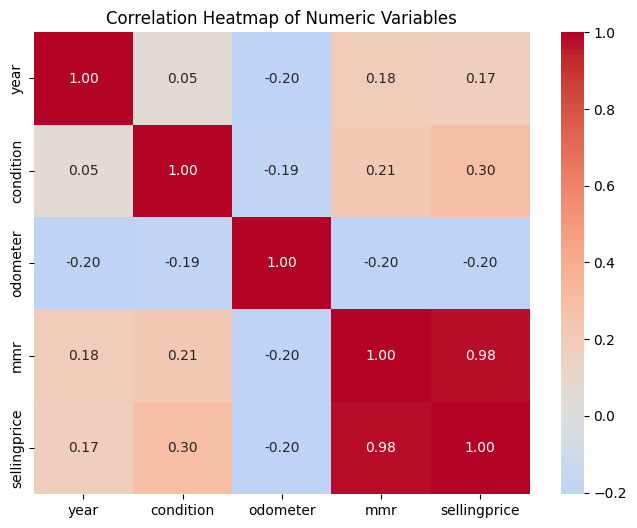

In [ ]:
# 数量変数のみで相関確認
# 数量変数のみを含むデータフレームを作成
numeric_df = df_train.select_dtypes(include='number')

# 相関行列を計算
correlation_matrix = numeric_df.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ②Make

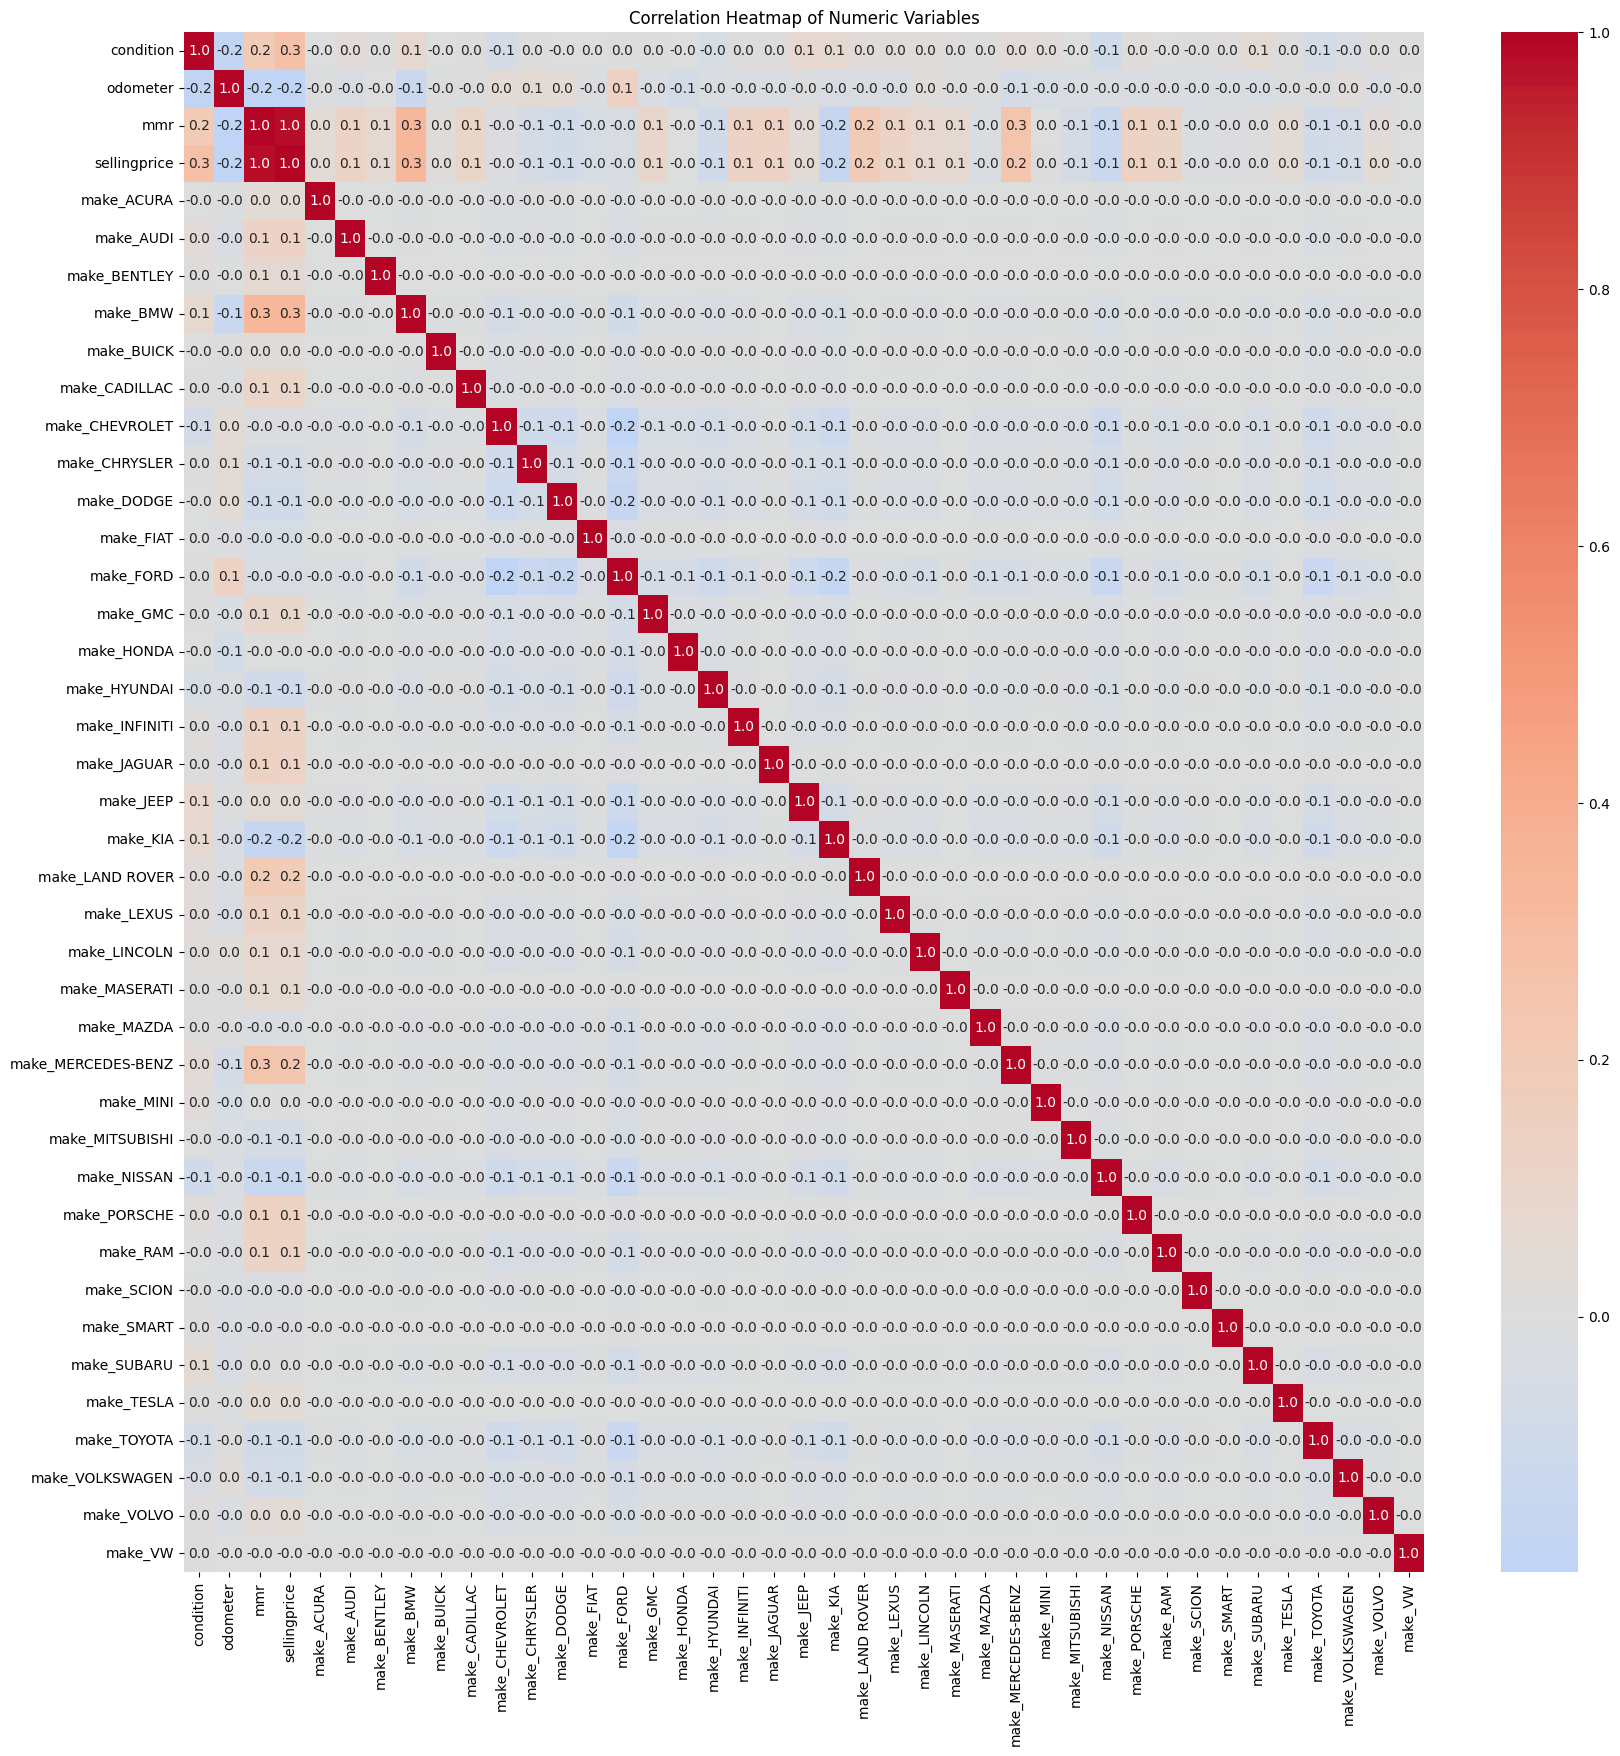

In [ ]:
# 使用変数: Make, Condition, Odmeter, MMR
df_train_make = df_train[["condition", "odometer", "mmr", "sellingprice", "make"]]
df_test_make = df_test[["condition", "odometer", "mmr", "make"]]

# 欠損値削除
df_train_make = df_train_make.dropna()
df_test_make = df_test_make.dropna()

# ワンホットエンコーディング
df_train_make = pd.get_dummies(df_train_make, drop_first=False)
df_train_make = df_train_make.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

df_train_make = pd.get_dummies(df_train_make, drop_first=False)
df_train_make = df_train_make.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_make.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ③Body

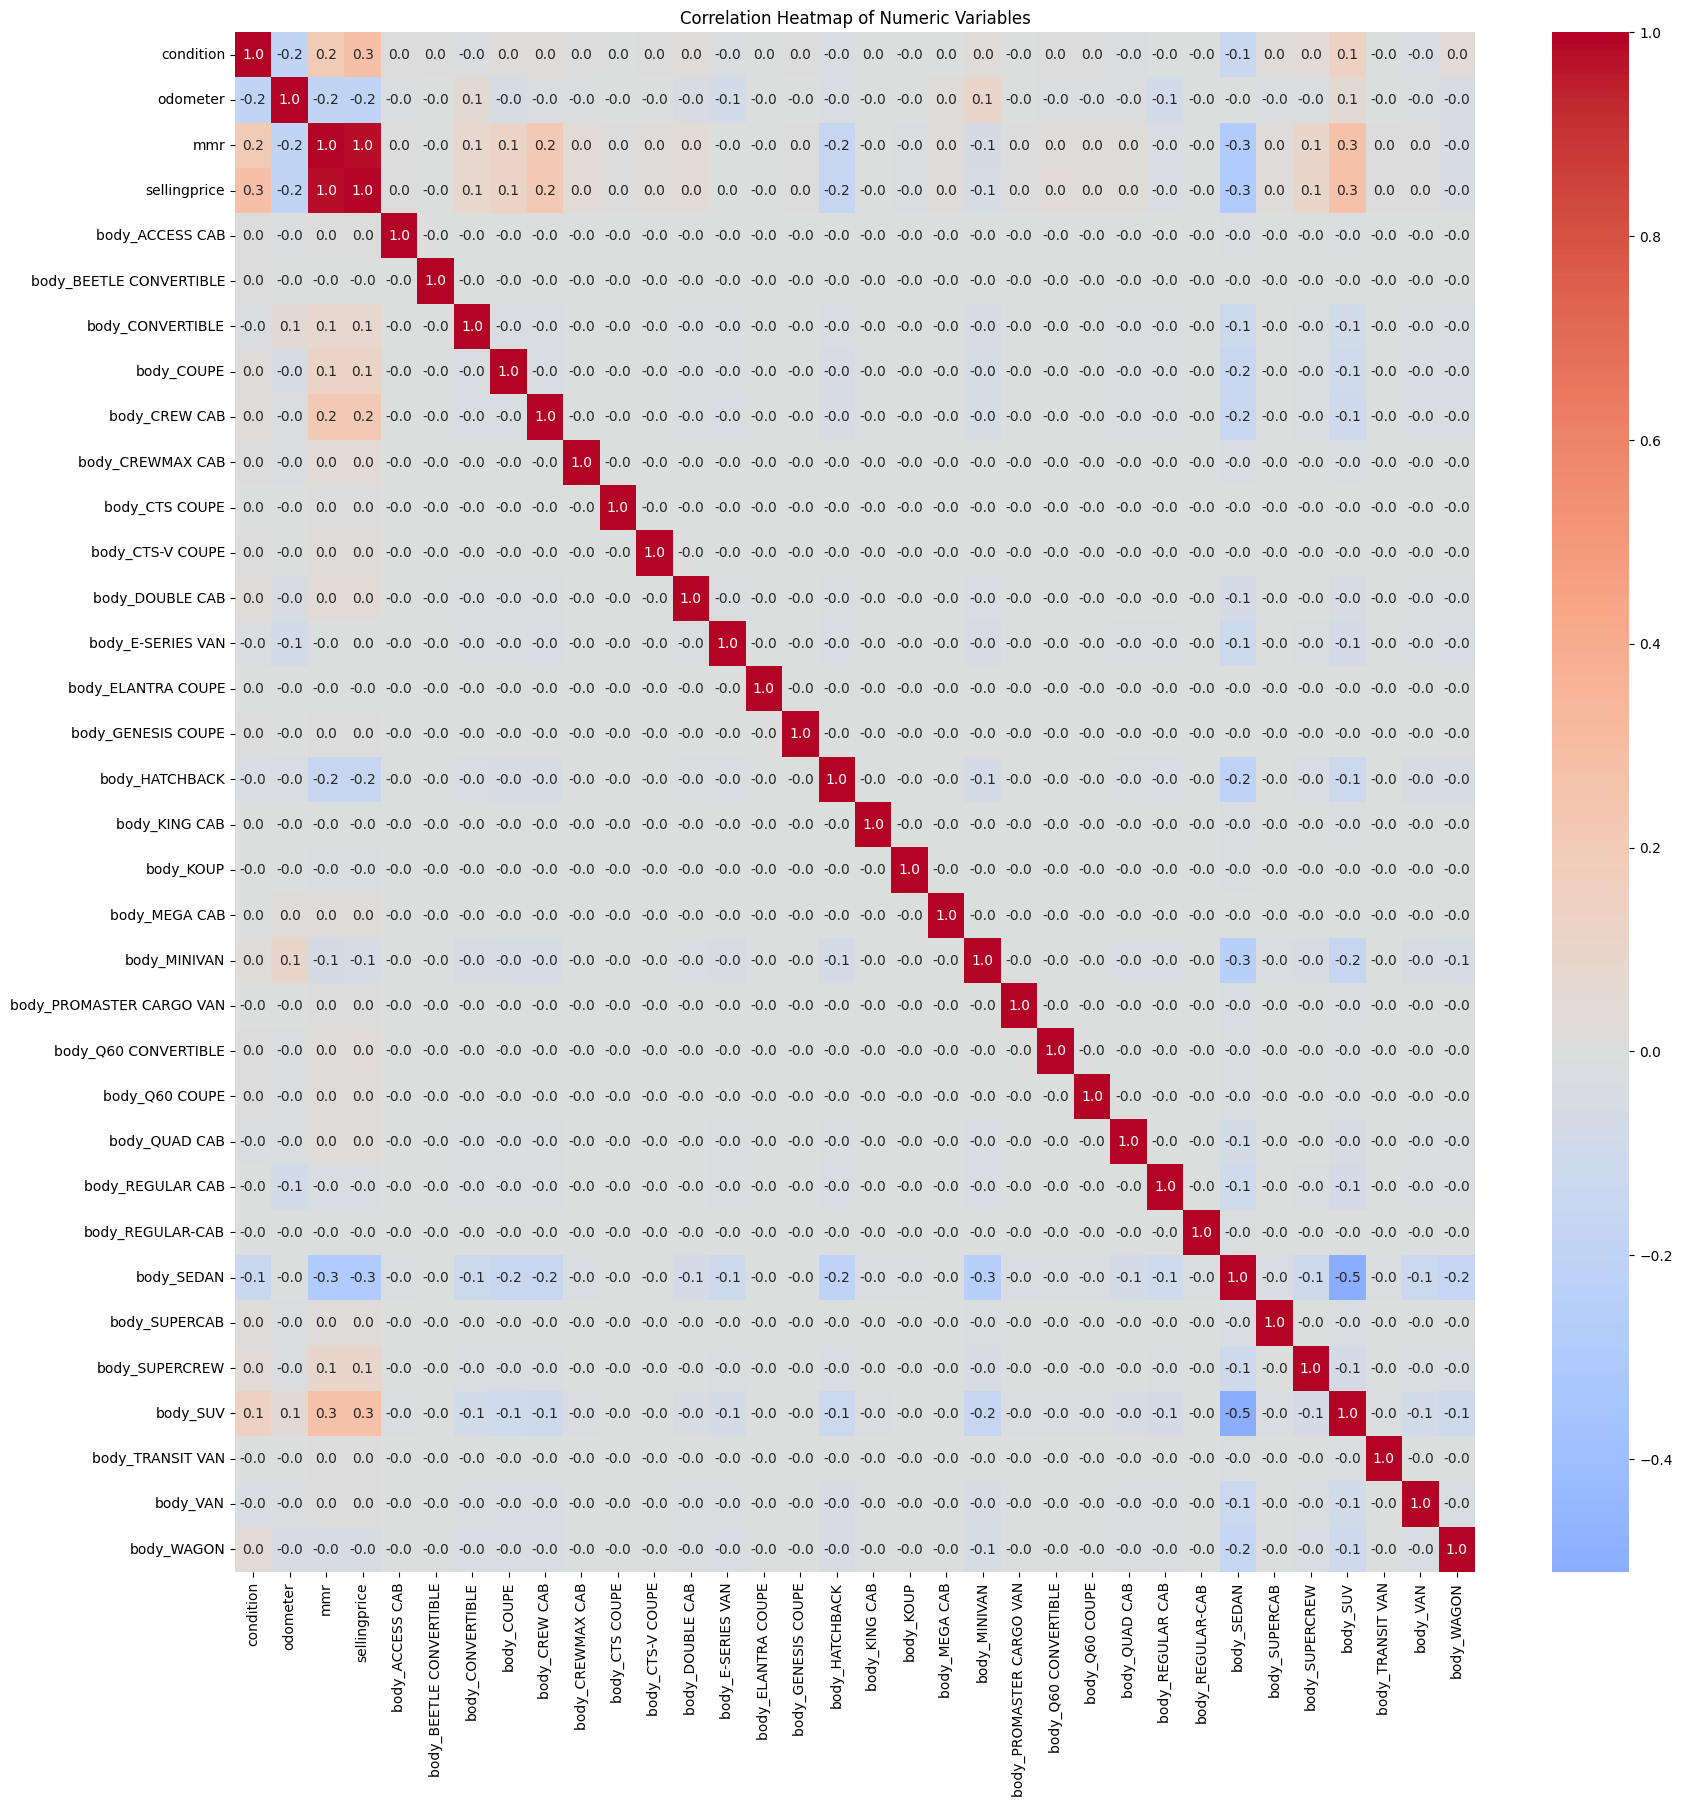

In [ ]:
# 使用変数: body, Condition, Odmeter, MMR
df_train_body = df_train[["condition", "odometer", "mmr", "sellingprice", "body"]]
df_test_body = df_test[["condition", "odometer", "mmr", "body"]]

# 欠損値削除
df_train_body = df_train_body.dropna()
df_test_body = df_test_body.dropna()

# ワンホットエンコーディング
df_train_body = pd.get_dummies(df_train_body, drop_first=False)
df_train_body = df_train_body.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

df_train_body = pd.get_dummies(df_train_body, drop_first=False)
df_train_body = df_train_body.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_body.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ④Interior

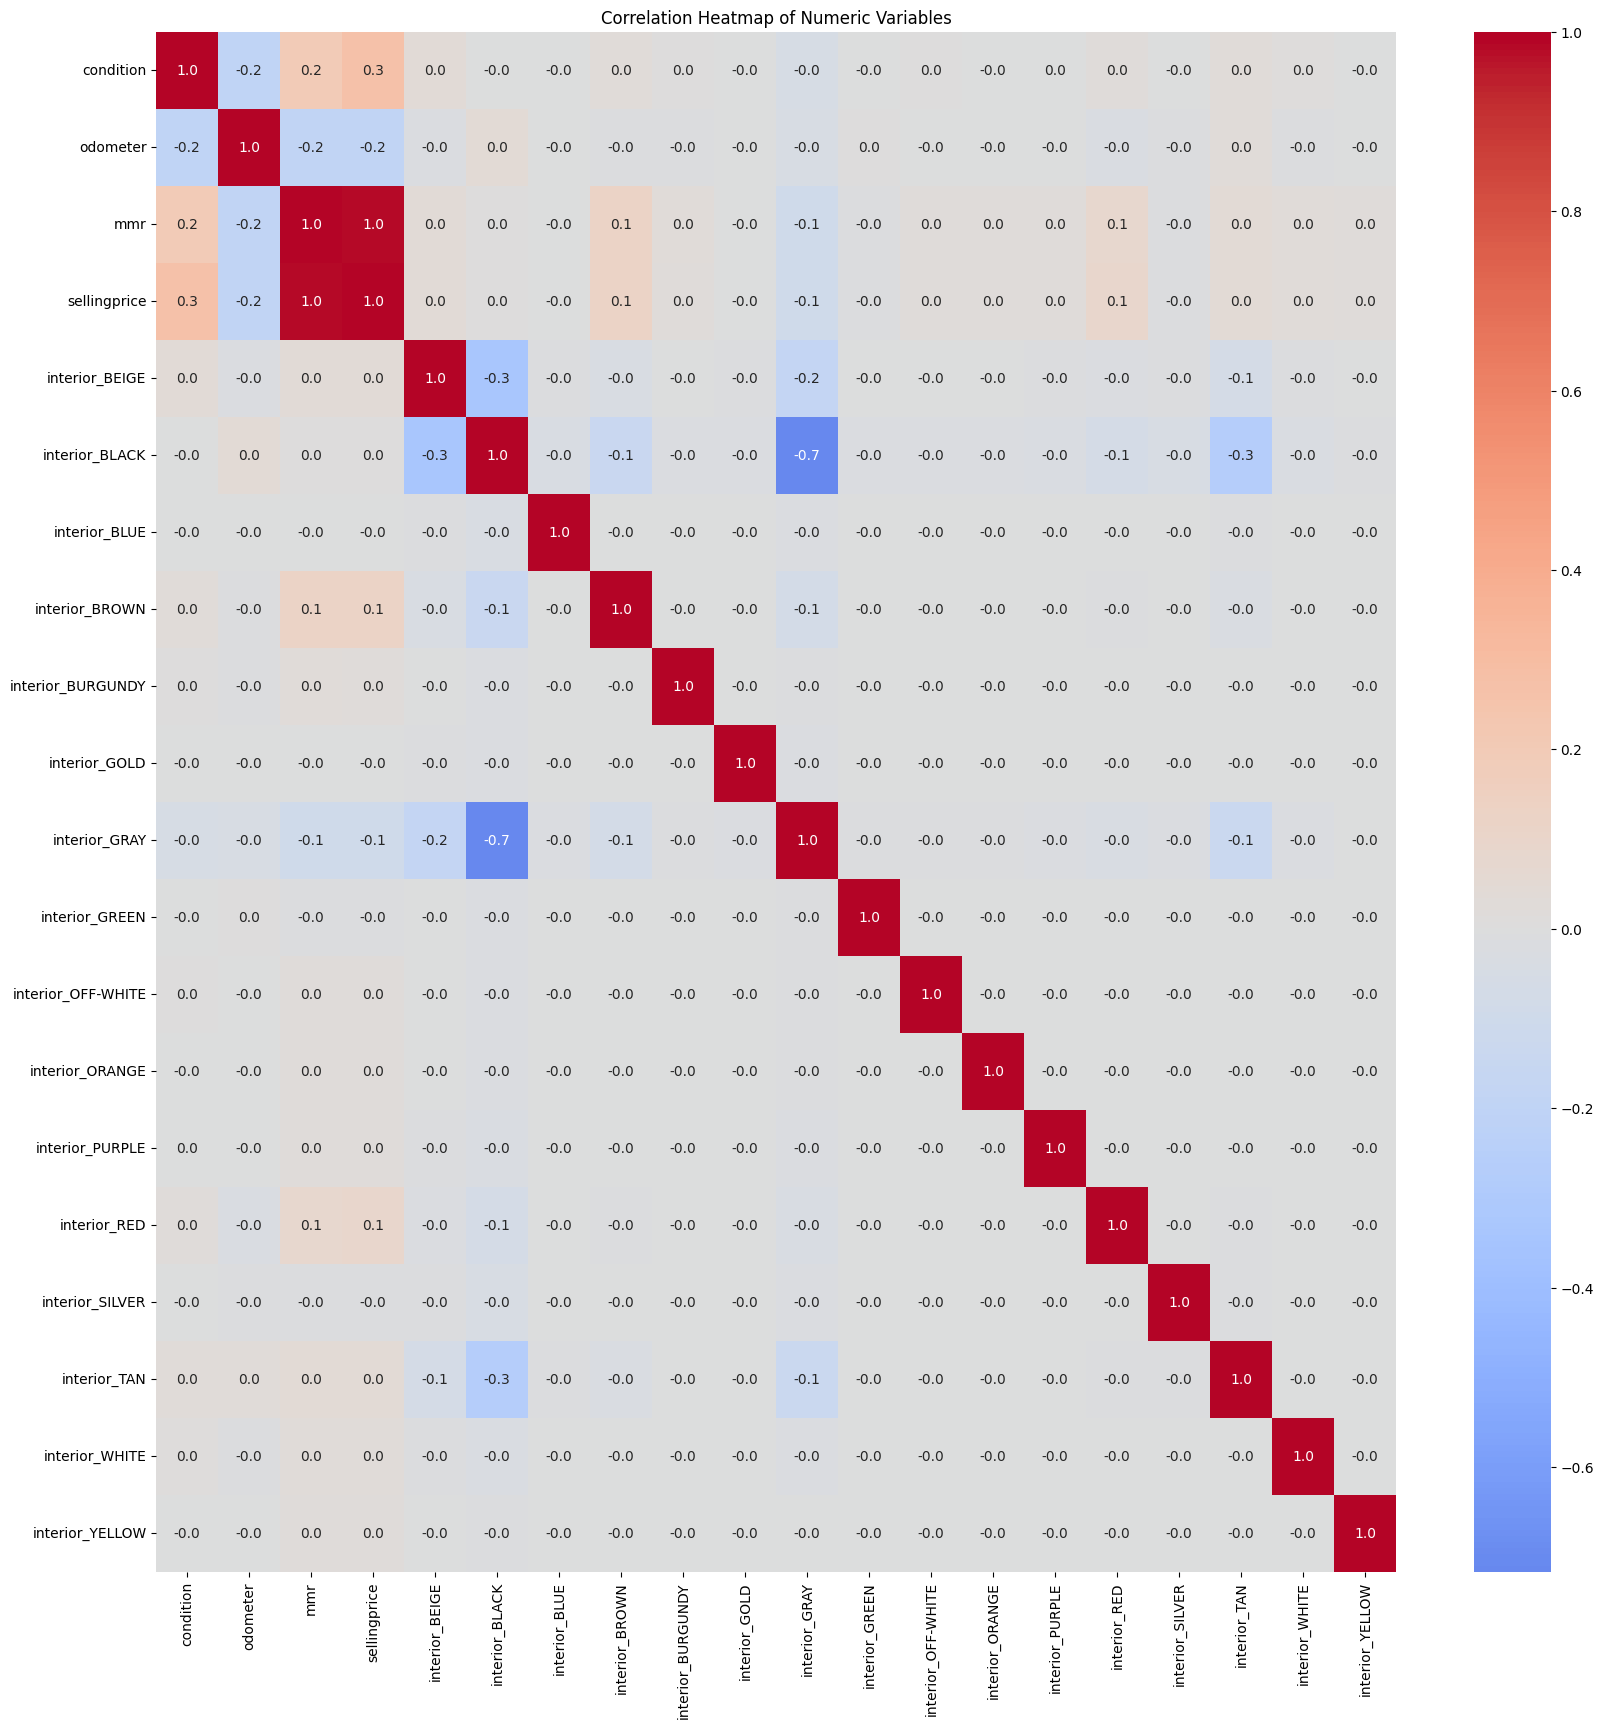

In [ ]:
# 使用変数: interior, Condition, Odmeter, MMR
df_train_interior = df_train[["condition", "odometer", "mmr", "sellingprice", "interior"]]
df_test_interior = df_test[["condition", "odometer", "mmr", "interior"]]

# 欠損値削除
df_train_interior = df_train_interior.dropna()
df_test_interior = df_test_interior.dropna()

# ワンホットエンコーディング
df_train_interior = pd.get_dummies(df_train_interior, drop_first=False)
df_train_interior = df_train_interior.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

df_train_interior = pd.get_dummies(df_train_interior, drop_first=False)
df_train_interior = df_train_interior.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_interior.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ⑤State

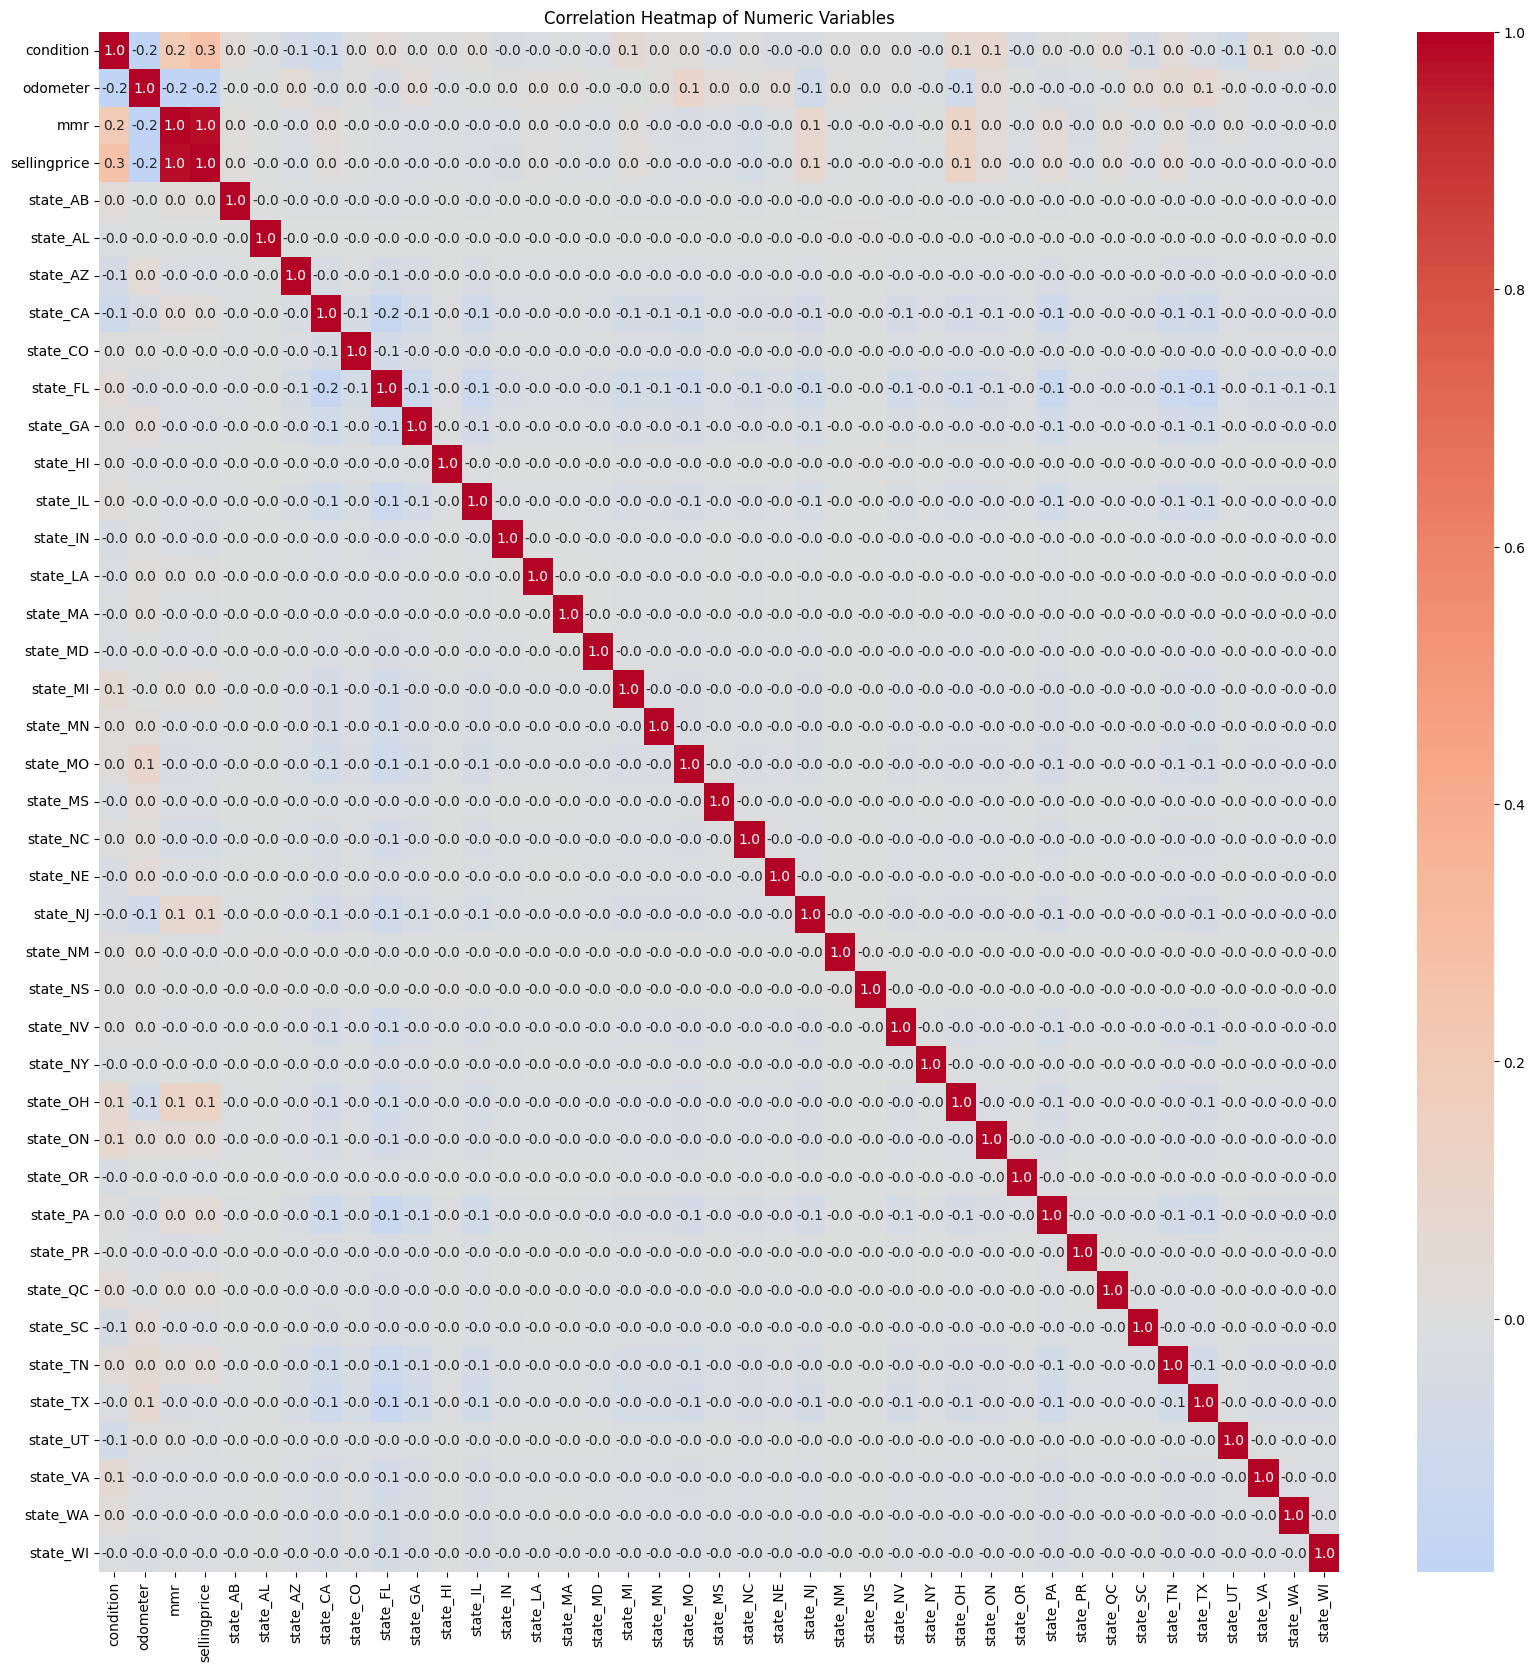

In [ ]:
# 使用変数: state, Condition, Odmeter, MMR
df_train_state = df_train[["condition", "odometer", "mmr", "sellingprice", "state"]]
df_test_state = df_test[["condition", "odometer", "mmr", "state"]]

# 欠損値削除
df_train_state = df_train_state.dropna()
df_test_state = df_test_state.dropna()

# ワンホットエンコーディング
df_train_state = pd.get_dummies(df_train_state, drop_first=False)
df_train_state = df_train_state.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

df_train_state = pd.get_dummies(df_train_state, drop_first=False)
df_train_state = df_train_state.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_state.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ⑥Model

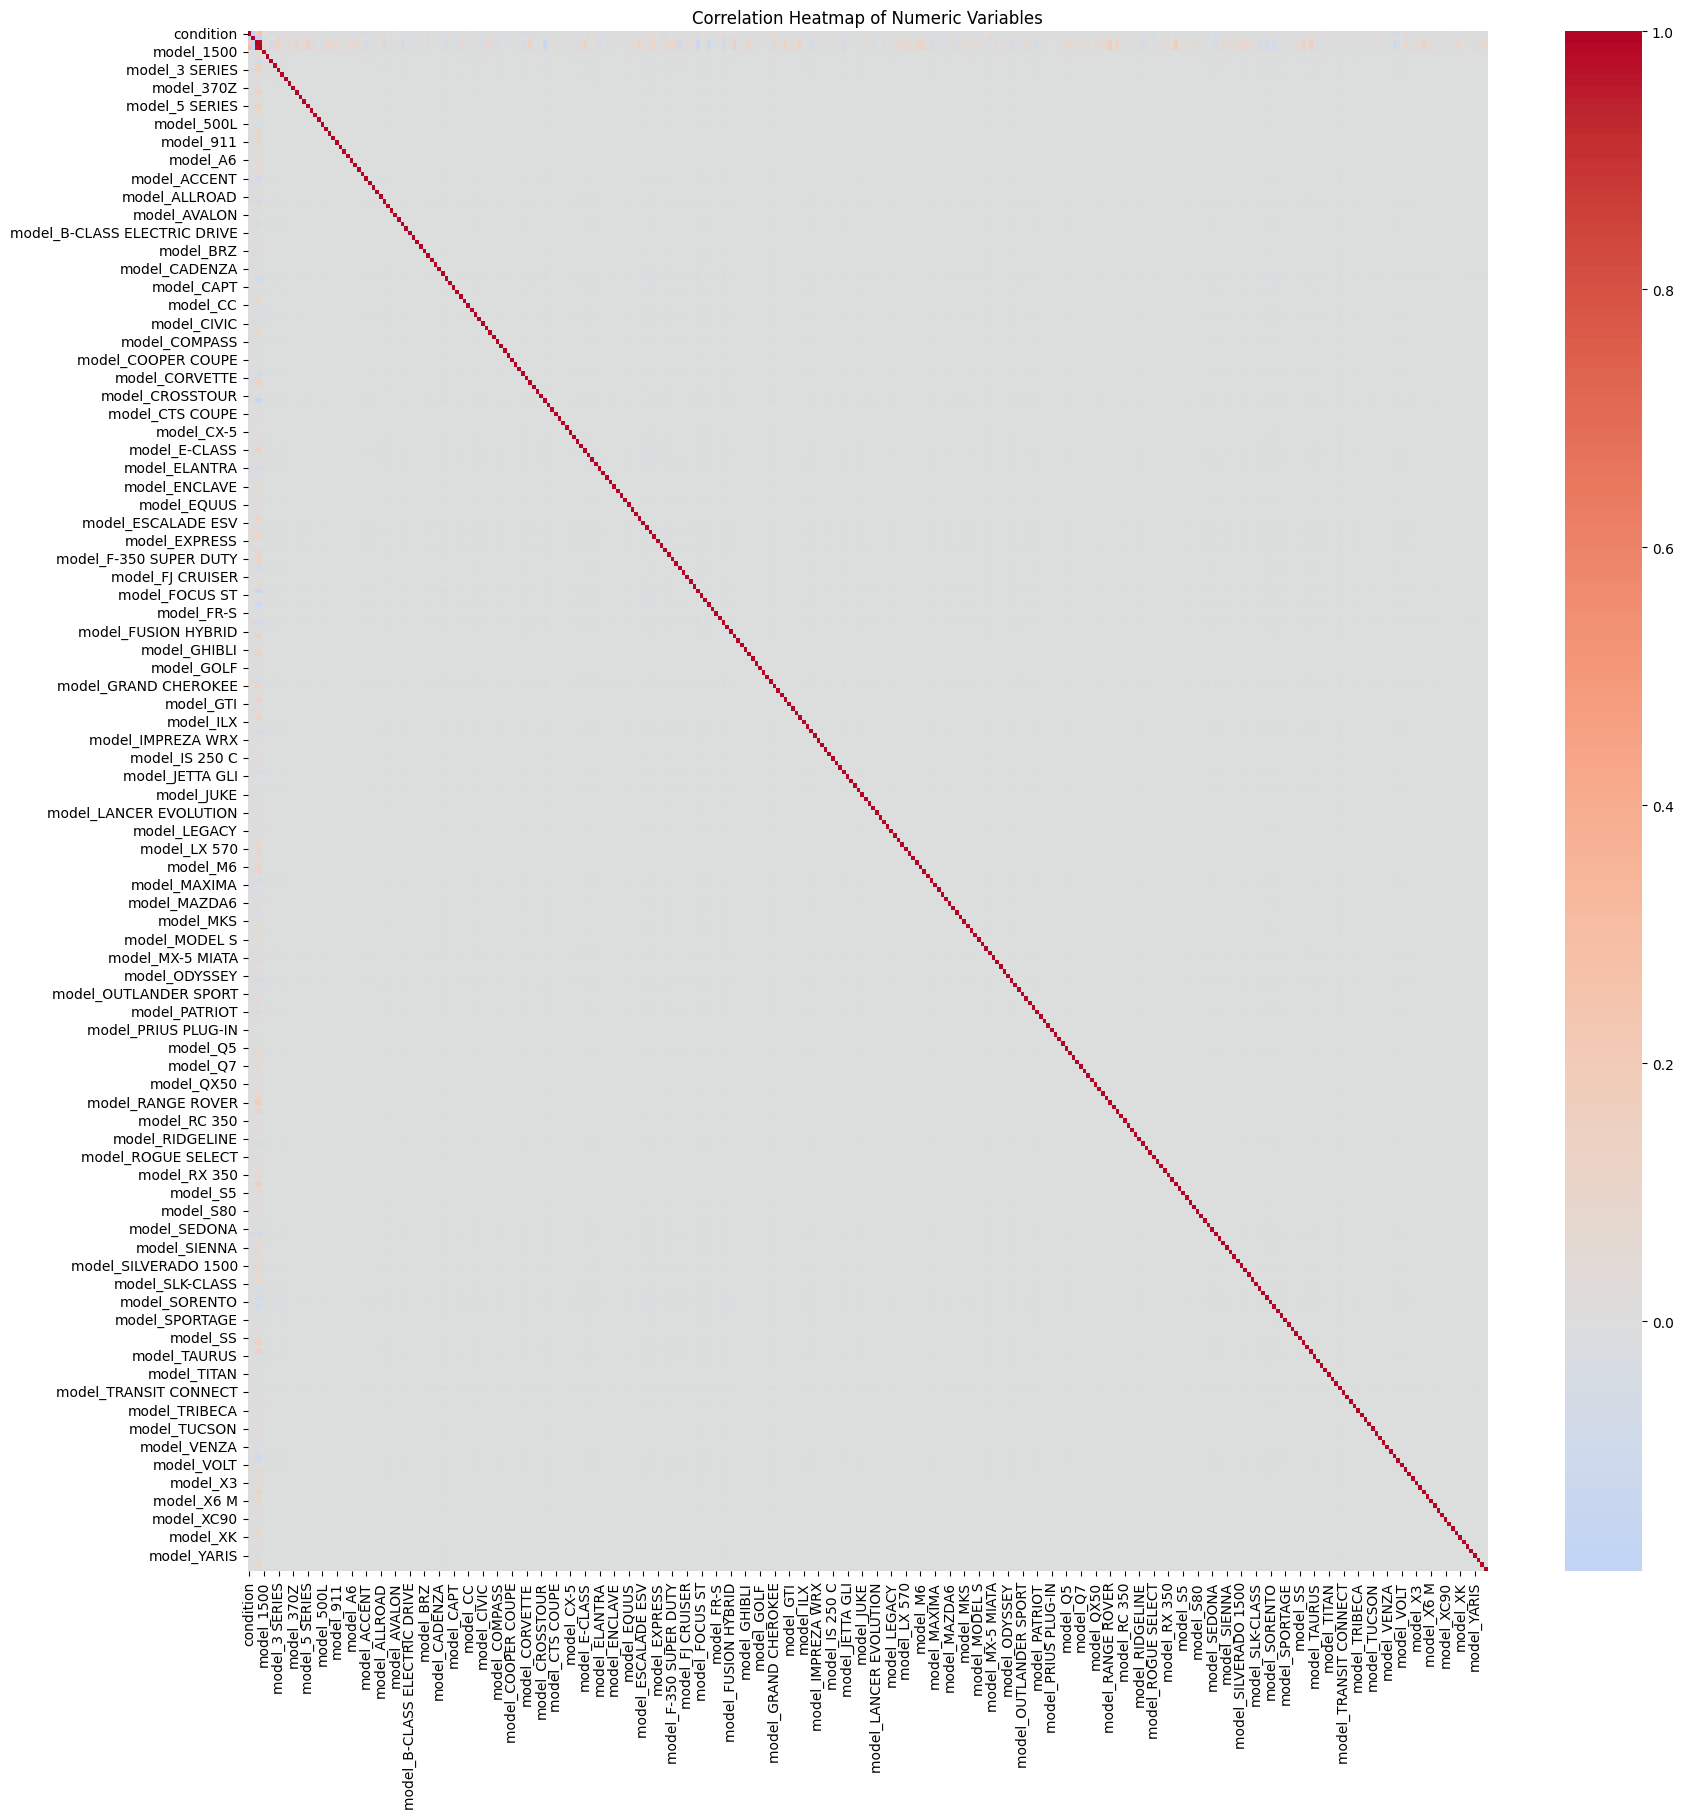

In [ ]:
# 使用変数: model, Condition, Odmeter, MMR
df_train_model = df_train[["condition", "odometer", "mmr", "sellingprice", "model"]]
df_test_model = df_test[["condition", "odometer", "mmr", "model"]]

# 欠損値削除
df_train_model = df_train_model.dropna()
df_test_model = df_test_model.dropna()

# ワンホットエンコーディング
df_train_model = pd.get_dummies(df_train_model, drop_first=False)
df_train_model = df_train_model.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

df_train_model = pd.get_dummies(df_train_model, drop_first=False)
df_train_model = df_train_model.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する

# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_model.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [ ]:
# 相関係数の絶対値を取得
abs_correlation = correlation_matrix.abs()

# 1.0より小さい相関係数のみを抽出
filtered_correlation = abs_correlation[abs_correlation < 1.0]

# 相関係数の絶対値を降順でソートし、上位30位の組み合わせを取得
top_30_correlation = filtered_correlation.unstack().sort_values(ascending=False).head(30)

# 上位30位の組み合わせを表示
print(top_30_correlation)

mmr                sellingprice         0.978638
sellingprice       mmr                  0.978638
condition          sellingprice         0.272585
sellingprice       condition            0.272585
odometer           mmr                  0.201260
mmr                odometer             0.201260
odometer           sellingprice         0.200675
sellingprice       odometer             0.200675
odometer           condition            0.197434
condition          odometer             0.197434
mmr                condition            0.195852
condition          mmr                  0.195852
model_S-CLASS      mmr                  0.181794
mmr                model_S-CLASS        0.181794
sellingprice       model_S-CLASS        0.177636
model_S-CLASS      sellingprice         0.177636
model_RANGE ROVER  mmr                  0.171285
mmr                model_RANGE ROVER    0.171285
sellingprice       model_RANGE ROVER    0.165240
model_RANGE ROVER  sellingprice         0.165240
model_TAHOE        m

# **４．前処理**

## ①初級版 (1easy)

train = 39,251 samples

test = 27,145 samples

<font color= "blue">Blue = 目的変数</font>

<font color= "lime">Green = 説明変数</font>

| # | 変数名 | 型 | trainユニ値 | testユニ値 | train欠損値 | test欠損値 | 採用 | train調整 | test調整 |
|    ---     |    ---     |    ---     |    ---     |    ---     |    ---     |   ---     |   ---     |   ---     |   ---     |
| 1  |  year  |  int64  | 2 | 2 |  0  |  0  |   ×  |      |       |
| 2  |  make  | object  |  37 | 37 |  297  |  222  |    ×  |      |      |
| 3  |  model  |  object  | 336 | 329 |  338  |  246  |    ×  |      |      |
| 4  |  trim  | object  | 460  | 441 |  297  |  222  |   ×  |       |      |
| 5  |  body  |  object  | 30 | 28 |  338  |  255  |   ×  |       |      |
| 6  |  traqnsmission  | object  | 2 | 2 |  5191  |  3456  |   ×  |       |      |
| 7  |  vin  |  object  | 39109 | 27069 |  1  |  0  |    ×  |      |      |
| 8  |  state  | object  | 37 | 36 |  1  |  0  |    ×  |      |      |
| 9  |  <font color= "lime">condition  |  float64  | 37 | 37 |  161  |  98  |    〇  |   標準化・欠損値削除   | 標準化・欠損値補完
| 10 |  <font color= "lime">odometer  | float64  | 25420 | 19847 |  3  |  1  |     〇  |   標準化・欠損値削除   |   標準化・欠損値補完   |
| 11 |  color  |  object  | 18 | 19 |  2974  |  623  |     ×  |      |      |
| 12 |  interior  | object  | 16 | 16 |  909  |  0  |     ×  |      |      |
| 13 |  seller  |  object  | 2226 | 1789 |  1  |  0  |     ×  |      |      |
| 14 |  <font color= "lime">mmr  | int64  | 753 | 738 |  1  |  0  |     〇  |  標準化・欠損値削除    |   標準化・欠損値補完   |
| 15 |  <font color= "blue">**sellingprice**</font>  |  int64  |  923 | NaN | 1  |  NaN  |     〇  |  欠損値削除    |  欠損値補完    |
| 16 |  salesdate  | datetime64  | 1700 | 1519 |   1  |  0  |    ×  |       |      |

### a. 不要列・行削除

In [ ]:
# 訓練とテストデータ　指定変数以外削除
df_train_1easy = df_train[["condition", "odometer", "mmr", "sellingprice"]]
df_test_1easy = df_test[["condition", "odometer", "mmr"]]

In [ ]:
# 訓練データ　欠損値ある行を削除
df_train_1easy.dropna(inplace=True)
df_train_1easy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63066 entries, 0 to 63335
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   condition     63066 non-null  float64
 1   odometer      63066 non-null  float64
 2   mmr           63066 non-null  int64  
 3   sellingprice  63066 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


<ipython-input-23-03ed6efcf210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1easy.dropna(inplace=True)


### b. 標準化

In [ ]:
# 訓練とテストデータ
# 標準化する列を選択
columns_to_standardize_easy = ['condition', 'odometer', 'mmr']

# StandardScalerをインスタンス化
scaler = StandardScaler()

# 選択した列に対して標準化を実行
df_train_1easy[columns_to_standardize_easy] = scaler.fit_transform(df_train_1easy[columns_to_standardize_easy])
df_test_1easy[columns_to_standardize_easy] = scaler.fit_transform(df_test_1easy[columns_to_standardize_easy])

<ipython-input-24-66bd187e62c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1easy[columns_to_standardize_easy] = scaler.fit_transform(df_train_1easy[columns_to_standardize_easy])
<ipython-input-24-66bd187e62c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1easy[columns_to_standardize_easy] = scaler.fit_transform(df_test_1easy[columns_to_standardize_easy])


## ②中級版  (1middle)

train = 39,251 samples

test = 27,145 samples

<font color= "blue">Blue = 目的変数</font>

<font color= "lime">Green = 説明変数</font>

| # | 変数名 | 型 | trainユニ値 | testユニ値 | train欠損値 | test欠損値 | 採用 | train調整 | test調整 |
|    ---     |    ---     |    ---     |    ---     |    ---     |    ---     |   ---     |   ---     |   ---     |   ---     |
| 1  |  year  |  int64  | 2 | 2 |  0  |  0  |   ×  |      |       |
| 2  |  <font color= "lime">make  | object  |  37 | 37 |  297  |  222  |    〇  |   ビニング3・ワンホット   |   ビニング3・ワンホット   |
| 3  |  model  |  object  | 336 | 329 |  338  |  246  |    ×  |      |      |
| 4  |  trim  | object  | 460  | 441 |  297  |  222  |   ×  |       |      |
| 5  |  body  |  object  | 30 | 28 |  338  |  255  |   ×  |       |      |
| 6  |  traqnsmission  | object  | 2 | 2 |  5191  |  3456  |   ×  |       |      |
| 7  |  vin  |  object  | 39109 | 27069 |  1  |  0  |    ×  |      |      |
| 8  |  state  | object  | 37 | 36 |  1  |  0  |    ×  |      |      |
| 9  |  <font color= "lime">condition  |  float64  | 37 | 37 |  161  |  98  |    〇  |   標準化・欠損値削除   | 標準化・欠損値補完
| 10 |  <font color= "lime">odometer  | float64  | 25420 | 19847 |  3  |  1  |     〇  |   標準化・欠損値削除   |   標準化・欠損値補完   |
| 11 |  color  |  object  | 18 | 19 |  2974  |  623  |     ×  |      |      |
| 12 |  interior  | object  | 16 | 16 |  909  |  0  |     ×  |      |      |
| 13 |  seller  |  object  | 2226 | 1789 |  1  |  0  |     ×  |      |      |
| 14 |  <font color= "lime">mmr  | int64  | 753 | 738 |  1  |  0  |     〇  |  標準化・欠損値削除    |   標準化・欠損値補完   |
| 15 |  <font color= "blue">**sellingprice**</font>  |  int64  |  923 | NaN | 1  |  NaN  |     〇  |  欠損値削除    |  欠損値補完    |
| 16 |  salesdate  | datetime64  | 1700 | 1519 |   1  |  0  |    ×  |       |      |

### a. 不要列・行削除

In [ ]:
# 訓練とテストデータ　指定変数以外削除
df_train_1middle = df_train[["condition", "odometer", "mmr", "make", "sellingprice"]]
df_test_1middle = df_test[["condition", "odometer", "mmr", "make"]]

In [ ]:
# 訓練データ　欠損値ある行を削除
df_train_1middle.dropna(inplace=True)
df_train_1middle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62578 entries, 0 to 63335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   condition     62578 non-null  float64
 1   odometer      62578 non-null  float64
 2   mmr           62578 non-null  int64  
 3   make          62578 non-null  object 
 4   sellingprice  62578 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ MB


<ipython-input-26-850844a3d57e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1middle.dropna(inplace=True)


### b. 標準化

In [ ]:
# 訓練とテストデータ
# 標準化する列を選択
columns_to_standardize_1middle = ['condition', 'odometer', 'mmr']

# 選択した列に対して標準化を実行
df_train_1middle[columns_to_standardize_1middle] = scaler.fit_transform(df_train_1middle[columns_to_standardize_1middle])
df_test_1middle[columns_to_standardize_1middle] = scaler.fit_transform(df_test_1middle[columns_to_standardize_1middle])

<ipython-input-27-c8bcfe439751>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1middle[columns_to_standardize_1middle] = scaler.fit_transform(df_train_1middle[columns_to_standardize_1middle])
<ipython-input-27-c8bcfe439751>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_1middle[columns_to_standardize_1middle] = scaler.fit_transform(df_test_1middle[columns_to_standardize_1middle])


### c. makeの3段階分け

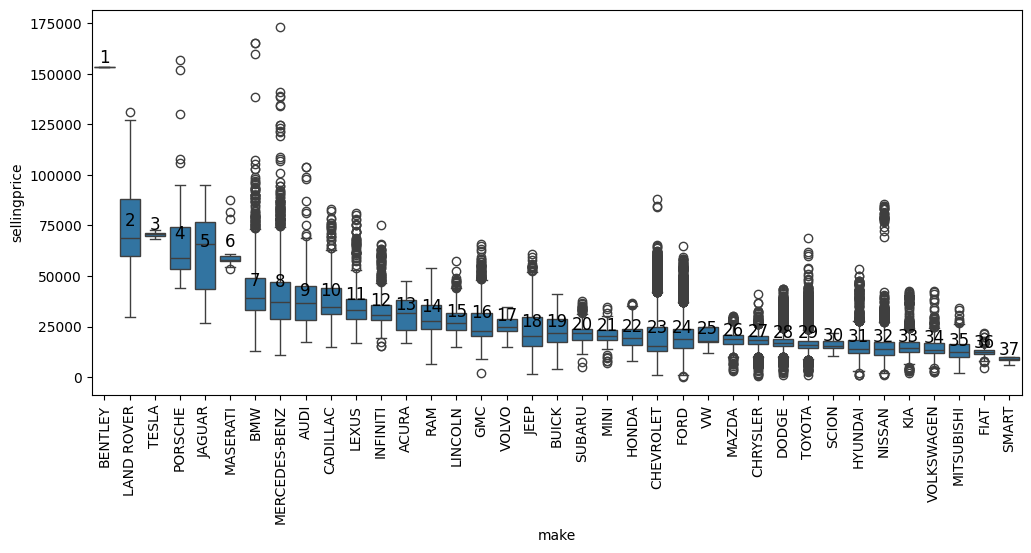

In [ ]:
# 各makeごとのsellingpriceの平均値を計算
mean_sellingprice_by_make = df_train_1middle.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

# 平均値の大きい順にmakeを並び替え
sorted_make = mean_sellingprice_by_make.index

# 平均値の大きい順にデータを並び替え
df_train_1middle_sorted = df_train_1middle[df_train_1middle['make'].isin(sorted_make)]

# Boxplotを作成
plt.figure(figsize=(12, 5))
sns.boxplot(x='make', y='sellingprice', data=df_train_1middle_sorted, order=sorted_make)
plt.xticks(rotation=90)  # x軸のラベルを垂直に表示

# ラベルの上に順位を表示
for i, make in enumerate(sorted_make):
    mean_rank = np.where(sorted_make == make)[0][0] + 1  # 平均値の順位を計算
    plt.text(i, mean_sellingprice_by_make[make], f'{mean_rank}', ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
# makeごとのsellingpriceの平均値を計算
mean_sellingprice_by_make = df_train_1middle.groupby('make')['sellingprice'].mean()

# 平均値で降順にソート
sorted_mean_sellingprice = mean_sellingprice_by_make.sort_values(ascending=False)

# 上位1-8をHigh、8-20をMiddle、それ以外をNormalに分類
categories = {}
for idx, make in enumerate(sorted_mean_sellingprice.index):
    if idx < 8:
        categories[make] = 'High'
    elif 8 < idx < 20:
        categories[make] = 'Middle'
    else:
        categories[make] = 'Normal'

# データフレームにカテゴリー列を追加
df_train_1middle['rank'] = df_train_1middle['make'].map(categories)

# Highに含まれるmake
high_makes = df_train_1middle[df_train_1middle['rank'] == 'High']['make'].unique()

# Middleに含まれるmake
middle_makes = df_train_1middle[df_train_1middle['rank'] == 'Middle']['make'].unique()

# Normalに含まれるmake
normal_makes = df_train_1middle[df_train_1middle['rank'] == 'Normal']['make'].unique()

print("High: 含まれるmake内の変数")
print(high_makes)
print()

print("Middle: 含まれるmake内の変数")
print(middle_makes)
print()

print("Normal: 含まれるmake内の変数")
print(normal_makes)
print()

High: 含まれるmake内の変数
['MERCEDES-BENZ' 'BMW' 'JAGUAR' 'MASERATI' 'LAND ROVER' 'PORSCHE' 'TESLA'
 'BENTLEY']

Middle: 含まれるmake内の変数
['GMC' 'CADILLAC' 'JEEP' 'LINCOLN' 'LEXUS' 'VOLVO' 'ACURA' 'INFINITI'
 'SUBARU' 'RAM' 'BUICK']

Normal: 含まれるmake内の変数
['FORD' 'KIA' 'HYUNDAI' 'HONDA' 'DODGE' 'CHRYSLER' 'NISSAN' 'CHEVROLET'
 'TOYOTA' 'MINI' 'SCION' 'MAZDA' 'AUDI' 'FIAT' 'MITSUBISHI' 'VOLKSWAGEN'
 'VW' 'SMART']



<ipython-input-29-7d73d33c77fe>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1middle['rank'] = df_train_1middle['make'].map(categories)


In [ ]:
# make列削除
df_train_1middle = df_train_1middle.drop(columns=["make"])

df_train_1middle.head()

,condition,odometer,mmr,sellingprice,rank
0,0.295622,-0.296516,-0.800386,12300,Normal
1,0.793106,-0.933146,-0.790888,13200,Normal
2,-2.564912,-0.537335,-0.724404,9300,Normal
3,0.544364,0.404892,0.263359,24200,Normal
4,1.166220,-0.751751,0.386829,23200,Normal


### d. rankのワンホット

In [ ]:
# categoryにワンホットエンコーディング
df_train_1middle = pd.get_dummies(df_train_1middle, drop_first=False)
df_train_1middle = df_train_1middle.astype(int)  # bool型をint型に変換して、Trueを1、Falseを0に変換する
df_train_1middle

,condition,odometer,mmr,sellingprice,rank_High,rank_Middle,rank_Normal
0,0,0,0,12300,0,0,1
1,0,0,0,13200,0,0,1
2,-2,0,0,9300,0,0,1
3,0,0,0,24200,0,0,1
4,1,0,0,23200,0,0,1
...,...,...,...,...,...,...,...
63331,0,0,0,16800,0,0,1
63332,0,0,0,14200,0,0,1
63333,0,0,0,20500,0,0,1
63334,0,0,3,47000,1,0,0


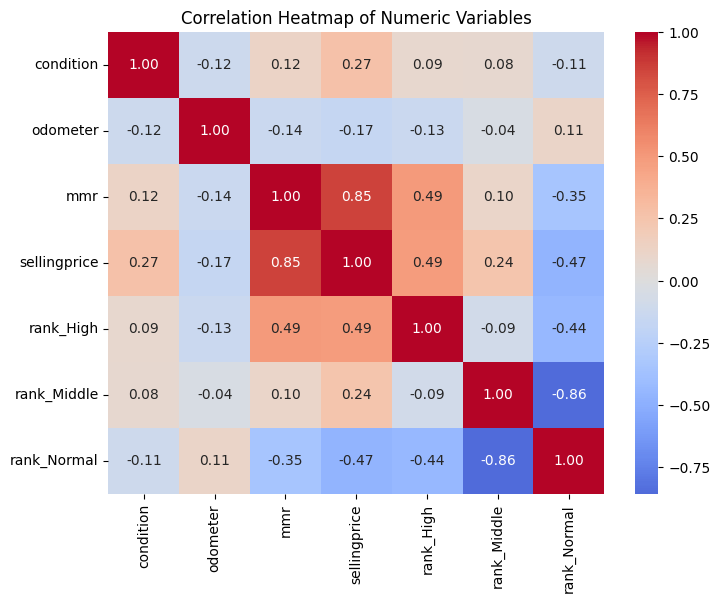

In [ ]:
# ランク含めた相関関係の確認
# 相関行列を計算
correlation_matrix = df_train_1middle.corr()

# 相関行列をヒートマップとして可視化
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## ③上級版  (1high)

train = 39,251 samples

test = 27,145 samples

<font color= "blue">Blue = 目的変数</font>

<font color= "lime">Green = 説明変数</font>

| # | 変数名 | 型 | trainユニ値 | testユニ値 | train欠損値 | test欠損値 | 採用 | train調整 | test調整 |
|    ---     |    ---     |    ---     |    ---     |    ---     |    ---     |   ---     |   ---     |   ---     |   ---     |
| 1  |  year  |  int64  | 2 | 2 |  0  |  0  |   ×  |      |       |
| 2  |  <font color= "lime">make  | object  |  37 | 37 |  297  |  222  |    〇  |   数量化 (連続ランク)   |   数量化 (連続ランク)   |
| 3  |  <font color= "lime">model  |  object  | 336 | 329 |  338  |  246  |    〇  |   数量化 (連続ランク)   |   数量化 (連続ランク)   |
| 4  |  trim  | object  | 460  | 441 |  297  |  222  |   ×  |       |      |
| 5  |  body  |  object  | 30 | 28 |  338  |  255  |   ×  |       |      |
| 6  |  traqnsmission  | object  | 2 | 2 |  5191  |  3456  |   ×  |       |      |
| 7  |  vin  |  object  | 39109 | 27069 |  1  |  0  |    ×  |      |      |
| 8  |  state  | object  | 37 | 36 |  1  |  0  |    ×  |      |      |
| 9  |  <font color= "lime">condition  |  float64  | 37 | 37 |  161  |  98  |    〇  |   標準化・欠損値削除   | 標準化・欠損値補完
| 10 |  <font color= "lime">odometer  | float64  | 25420 | 19847 |  3  |  1  |     〇  |   標準化・欠損値削除   |   標準化・欠損値補完   |
| 11 |  color  |  object  | 18 | 19 |  2974  |  623  |     ×  |      |      |
| 12 |  interior  | object  | 16 | 16 |  909  |  0  |     ×  |      |      |
| 13 |  seller  |  object  | 2226 | 1789 |  1  |  0  |     ×  |      |      |
| 14 |  <font color= "lime">mmr  | int64  | 753 | 738 |  1  |  0  |     〇  |  標準化・欠損値削除    |   標準化・欠損値補完   |
| 15 |  <font color= "blue">**sellingprice**</font>  |  int64  |  923 | NaN | 1  |  NaN  |     〇  |  欠損値削除    |  欠損値補完    |
| 16 |  salesdate  | datetime64  | 1700 | 1519 |   1  |  0  |    ×  |       |      |

### a. カテ変数を数量変換しsellingpriceとの相関確認

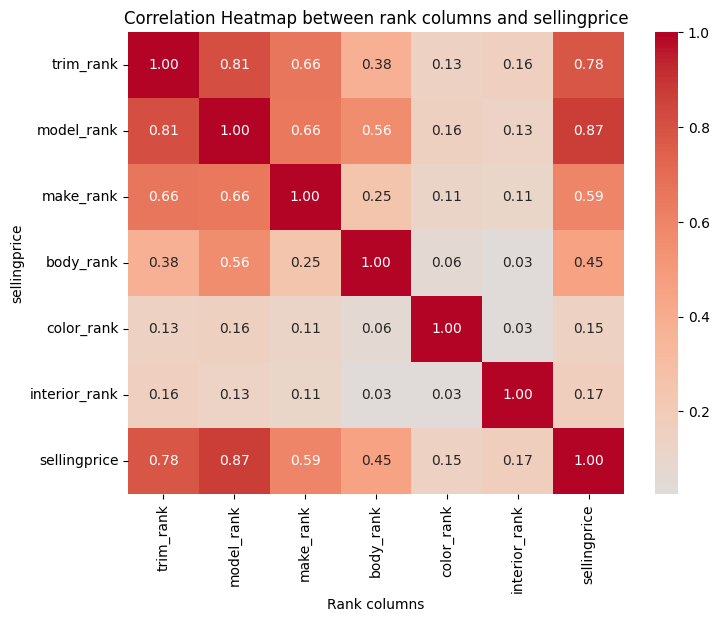

In [ ]:
# 新しいDataFrame df_train_1high を作成し、df_train の内容をそのままコピー
df_train_1high = df_train.copy()

# 列名のリスト
columns_to_rank = ['trim', 'model', 'make', 'body', 'color', 'interior']

# 平均sellingpriceを計算し、順位付けして新しい列を追加する関数
def add_rank_column(df_train_1high, column_name, target_column):
    mean_price_by_column = df_train_1high.groupby(column_name)[target_column].mean()
    ranked_column = mean_price_by_column.sort_values(ascending=True).index
    df_train_1high[column_name + '_rank'] = df_train_1high[column_name].map({value: rank + 1 for rank, value in enumerate(ranked_column)})
    return df_train_1high

# 各列に対して順位付けを行う
for column in columns_to_rank:
    df_train_1high = add_rank_column(df_train_1high, column, 'sellingprice')

# 相関ヒートマップの作成
correlation_matrix = df_train_1high[['trim_rank', 'model_rank', 'make_rank', 'body_rank', 'color_rank', 'interior_rank', 'sellingprice']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap between rank columns and sellingprice')
plt.xlabel('Rank columns')
plt.ylabel('sellingprice')
plt.show()

### b. 訓練データのみ不要列・行削除

In [ ]:
# 訓練とテストデータ　指定変数以外削除
df_train_1high = df_train_1high[["condition", "odometer", "mmr", 'model_rank', 'make_rank', "sellingprice"]]
df_test_1high = df_test[["condition", "odometer", "mmr", "model", "make"]]

In [ ]:
# 訓練データ　欠損値ある行を削除
df_train_1high.dropna(inplace=True)
df_train_1high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62504 entries, 0 to 63335
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   condition     62504 non-null  float64
 1   odometer      62504 non-null  float64
 2   mmr           62504 non-null  int64  
 3   model_rank    62504 non-null  float64
 4   make_rank     62504 non-null  float64
 5   sellingprice  62504 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 3.3 MB


<ipython-input-35-6691e586f4b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1high.dropna(inplace=True)


### c. 訓練データのみ標準化

In [ ]:
# 訓練データ
# 標準化する列を選択
columns_to_standardize_1high_train = ['condition', 'odometer', 'mmr', 'model_rank', 'make_rank']

# 選択した列に対して標準化を実行
df_train_1high[columns_to_standardize_1high_train] = scaler.fit_transform(df_train_1high[columns_to_standardize_1high_train])

<ipython-input-36-0d4f3ce5535a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_1high[columns_to_standardize_1high_train] = scaler.fit_transform(df_train_1high[columns_to_standardize_1high_train])


In [ ]:
df_train_1high.head()

,condition,odometer,mmr,model_rank,make_rank,sellingprice
0,0.296246,-0.297816,-0.804387,-1.100223,0.085402,12300
1,0.793601,-0.934571,-0.794783,-1.087055,-1.126263,13200
2,-2.563548,-0.538682,-0.727550,-1.060720,-0.974805,9300
3,0.544923,0.403730,0.271337,0.387720,0.388319,24200
4,1.166618,-0.753141,0.396198,-0.165320,0.085402,23200


# **５．学習検証**

## ①決定木

In [ ]:
from sklearn.metrics import mean_absolute_error

for df_name, df in dfs.items():
    print(f"データフレーム {df_name}")
    # 特徴量とターゲットの定義
    X = df.drop(columns=['sellingprice'])  # 特徴量
    y = df['sellingprice']  # ターゲット

    # 学習データとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 決定木モデルのインスタンス化
    model = DecisionTreeRegressor(random_state=0)

    # モデルの学習
    model.fit(X_train, y_train)

    # 訓練データのスコア
    train_score = model.score(X_train, y_train)
    print("訓練データのスコア (R^2):", train_score)

    # 検証データのスコア
    test_score = model.score(X_test, y_test)
    print("検証データのスコア (R^2):", test_score)

    # MAPEの計算
    y_pred = model.predict(X_test)
    mape = mean_absolute_error(y_test, y_pred) / y_test.mean()
    print("MAPE:", mape)

    print("\n")

データフレーム df_train_1easy
訓練データのスコア (R^2): 0.9999996346465964
検証データのスコア (R^2): 0.9424422371485058
MAPE: 0.07049955819828305


データフレーム df_train_1middle
訓練データのスコア (R^2): 0.8116965797128096
検証データのスコア (R^2): 0.7945729547880364
MAPE: 0.17700226662018265


データフレーム df_train_1high
訓練データのスコア (R^2): 0.9999998842218042
検証データのスコア (R^2): 0.9396846737721499
MAPE: 0.07003938446927079




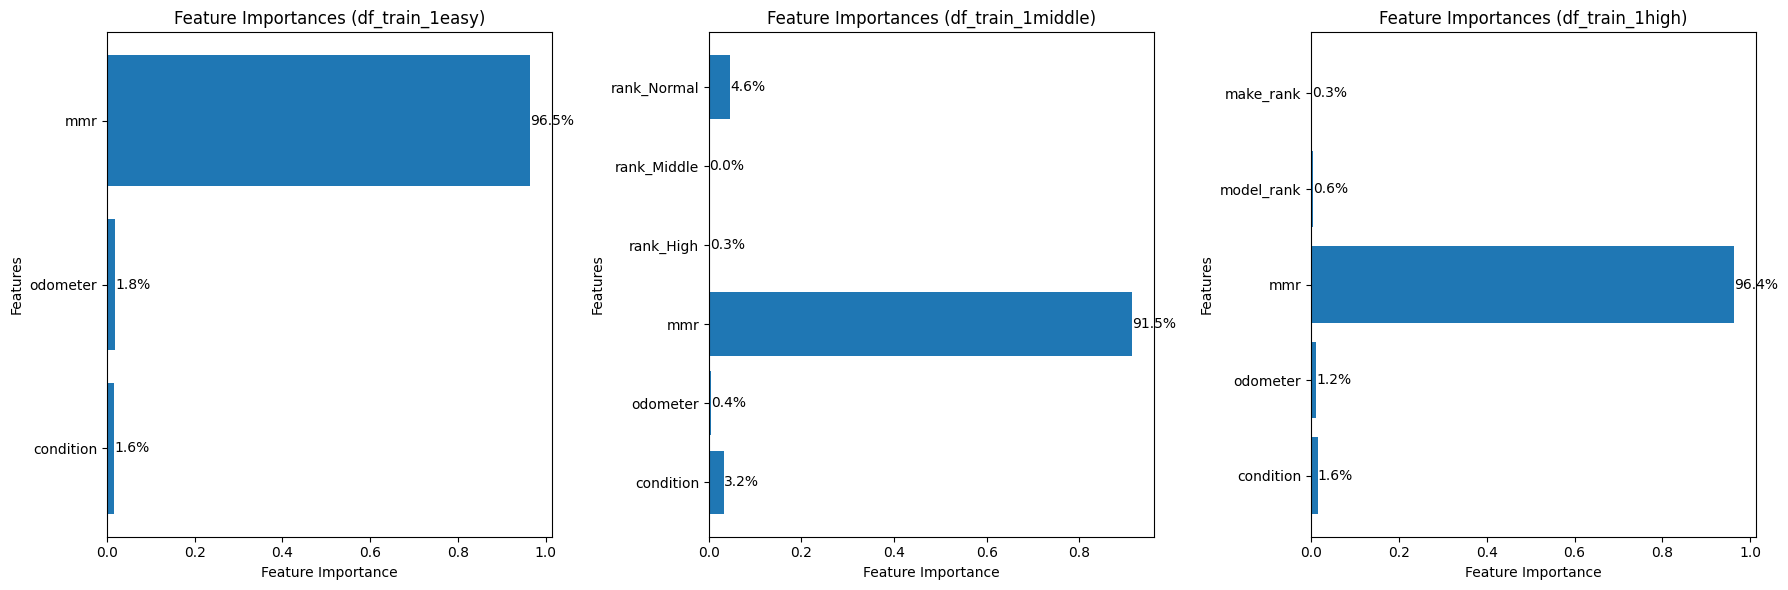

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# データフレームごとに処理を行う
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (df_name, df) in enumerate({"df_train_1easy": df_train_1easy, "df_train_1middle": df_train_1middle, "df_train_1high": df_train_1high}.items()):
    # 特徴量とターゲットを分割
    X = df.drop(columns=['sellingprice'])
    y = df['sellingprice']

    # 決定木モデルのインスタンス化
    model = DecisionTreeRegressor(random_state=0)

    # モデルの学習
    model.fit(X, y)

    # 特徴量の重要度を取得
    feature_importances = model.feature_importances_

    # 各特徴量の重要度の合計を計算
    total_importance = sum(feature_importances)

    # グラフの描画
    axs[i].barh(range(len(feature_importances)), feature_importances)
    axs[i].set_yticks(range(len(feature_importances)))
    axs[i].set_yticklabels(X.columns)
    axs[i].set_xlabel('Feature Importance')
    axs[i].set_ylabel('Features')
    axs[i].set_title(f'Feature Importances ({df_name})')

    # 各棒グラフに全体の割合を表示
    for j, importance in enumerate(feature_importances):
        axs[i].text(importance, j, f"{importance / total_importance:.1%}", ha='left', va='center')

# グラフ間のスペースを調整
plt.tight_layout()
plt.show()

## ②線形回帰

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# データフレームと名前の対応を辞書で定義
dfs = {
    "df_train_1easy": df_train_1easy,
    "df_train_1middle": df_train_1middle,
    "df_train_1high": df_train_1high
}

In [ ]:
for df_name, df in dfs.items():
    print(f"データフレーム {df_name}")
    # 特徴量とターゲットの定義
    X = df.drop(columns=['sellingprice'])  # 特徴量
    y = df['sellingprice']  # ターゲット

    # 学習データとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 線形回帰モデルのインスタンス化
    model = LinearRegression()

    # モデルの学習
    model.fit(X_train, y_train)

    # 訓練データのスコア
    train_score = model.score(X_train, y_train)
    print("訓練データのスコア (R^2):", train_score)

    # 検証データのスコア
    test_score = model.score(X_test, y_test)
    print("検証データのスコア (R^2):", test_score)

    # MAPEの計算
    y_pred = model.predict(X_test)
    mape = mean_absolute_error(y_test, y_pred) / y_test.mean()
    print("MAPE:", mape)

    print("\n")

データフレーム df_train_1easy
訓練データのスコア (R^2): 0.9678727808920132
検証データのスコア (R^2): 0.9664685387186991
MAPE: 0.05233765123961058


データフレーム df_train_1middle
訓練データのスコア (R^2): 0.7849691325978572
検証データのスコア (R^2): 0.7727160742434304
MAPE: 0.19198931764502622


データフレーム df_train_1high
訓練データのスコア (R^2): 0.9668602851021569
検証データのスコア (R^2): 0.9691159793079992
MAPE: 0.05268478408291543




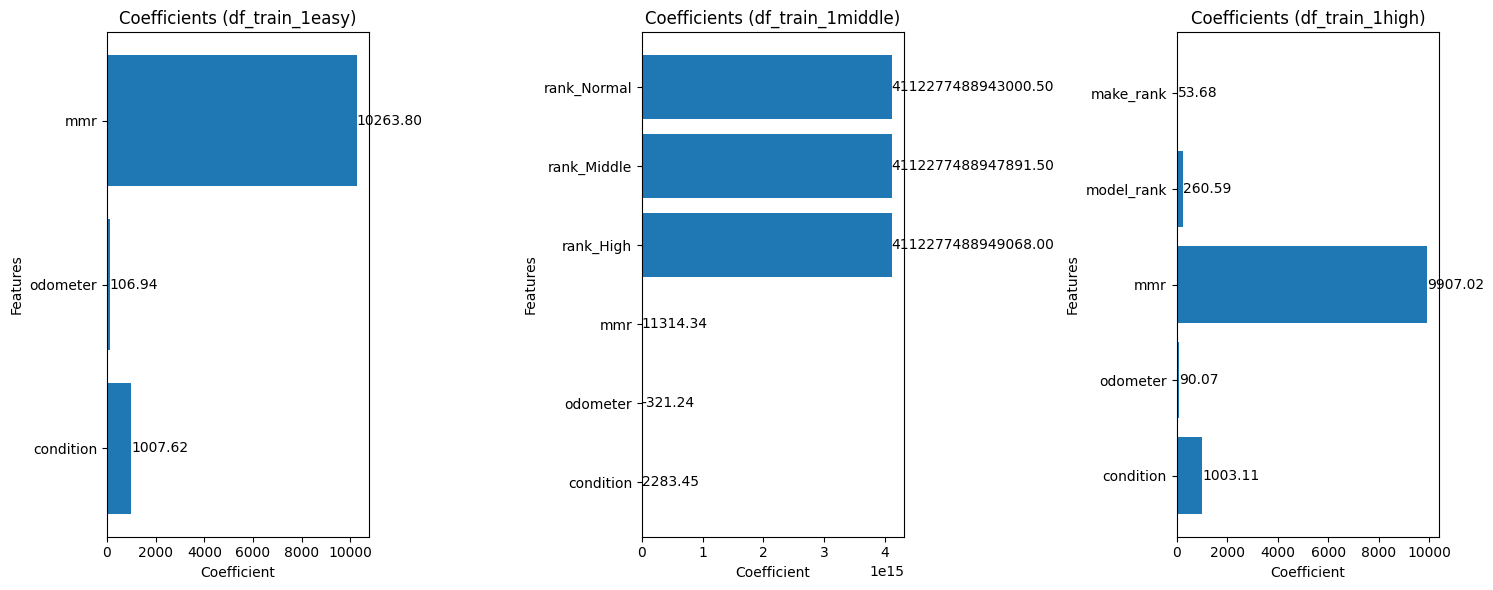

In [ ]:
# グラフの幅と高さを設定
fig, axs = plt.subplots(1, len(dfs), figsize=(15, 6))

for i, (df_name, df) in enumerate(dfs.items()):
    # 特徴量とターゲットの定義
    X = df.drop(columns=['sellingprice'])  # 特徴量
    y = df['sellingprice']  # ターゲット

    # 線形回帰モデルのインスタンス化
    model = LinearRegression()

    # モデルの学習
    model.fit(X, y)

    # 係数と特徴量名の対応を取得
    coefs = model.coef_
    feature_names = X.columns

    # グラフの描画
    bars = axs[i].barh(feature_names, coefs)
    axs[i].set_xlabel('Coefficient')
    axs[i].set_ylabel('Features')
    axs[i].set_title(f'Coefficients ({df_name})')

    # 各棒グラフに係数を表示
    for bar, coef in zip(bars, coefs):
        axs[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{coef:.2f}',
                    va='center', ha='left')

# グラフ間のスペースを調整
plt.tight_layout()
plt.show()

In [ ]:
for df_name, df in dfs.items():
    # 特徴量とターゲットの定義
    X = df.drop(columns=['sellingprice'])  # 特徴量
    y = df['sellingprice']  # ターゲット

    # 線形回帰モデルのインスタンス化
    model = LinearRegression()

    # モデルの学習
    model.fit(X, y)

    # 切片の表示
    intercept = model.intercept_
    print(f"データフレーム {df_name} の切片: {intercept}")

データフレーム df_train_1easy の切片: 20746.30793829466
データフレーム df_train_1middle の切片: -4112277488925014.5
データフレーム df_train_1high の切片: 20703.478129596657


## ③ランダムフォレスト

In [ ]:
for df_name, df in dfs.items():
    print(f"データフレーム {df_name}")

    # 特徴量とターゲットの定義
    X = df.drop(columns=['sellingprice'])  # 特徴量
    y = df['sellingprice']  # ターゲット

    # 学習データとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ランダムフォレストモデルのインスタンス化
    model = RandomForestRegressor(random_state=0)

    # モデルの学習
    model.fit(X_train, y_train)

    # 訓練データのスコア（R^2）
    train_r2_score = model.score(X_train, y_train)
    print("訓練データのスコア (R^2):", train_r2_score)

    # 検証データのスコア（R^2）
    test_r2_score = model.score(X_test, y_test)
    print("検証データのスコア (R^2):", test_r2_score)

    # テストデータの予測値の取得
    y_pred = model.predict(X_test)

    # MAPEの計算
    mape_score = mean_absolute_error(y_test, y_pred) / np.mean(y_test)
    print("MAPE:", mape_score)
    print("\n")

データフレーム df_train_1easy
訓練データのスコア (R^2): 0.995208336292382
検証データのスコア (R^2): 0.9647946232963801
MAPE: 5.370190190611196


データフレーム df_train_1middle
訓練データのスコア (R^2): 0.811409630584596
検証データのスコア (R^2): 0.7955169863777259
MAPE: 17.683253867084197


データフレーム df_train_1high
訓練データのスコア (R^2): 0.9953752448753245
検証データのスコア (R^2): 0.9683751465073288
MAPE: 5.076415008146763




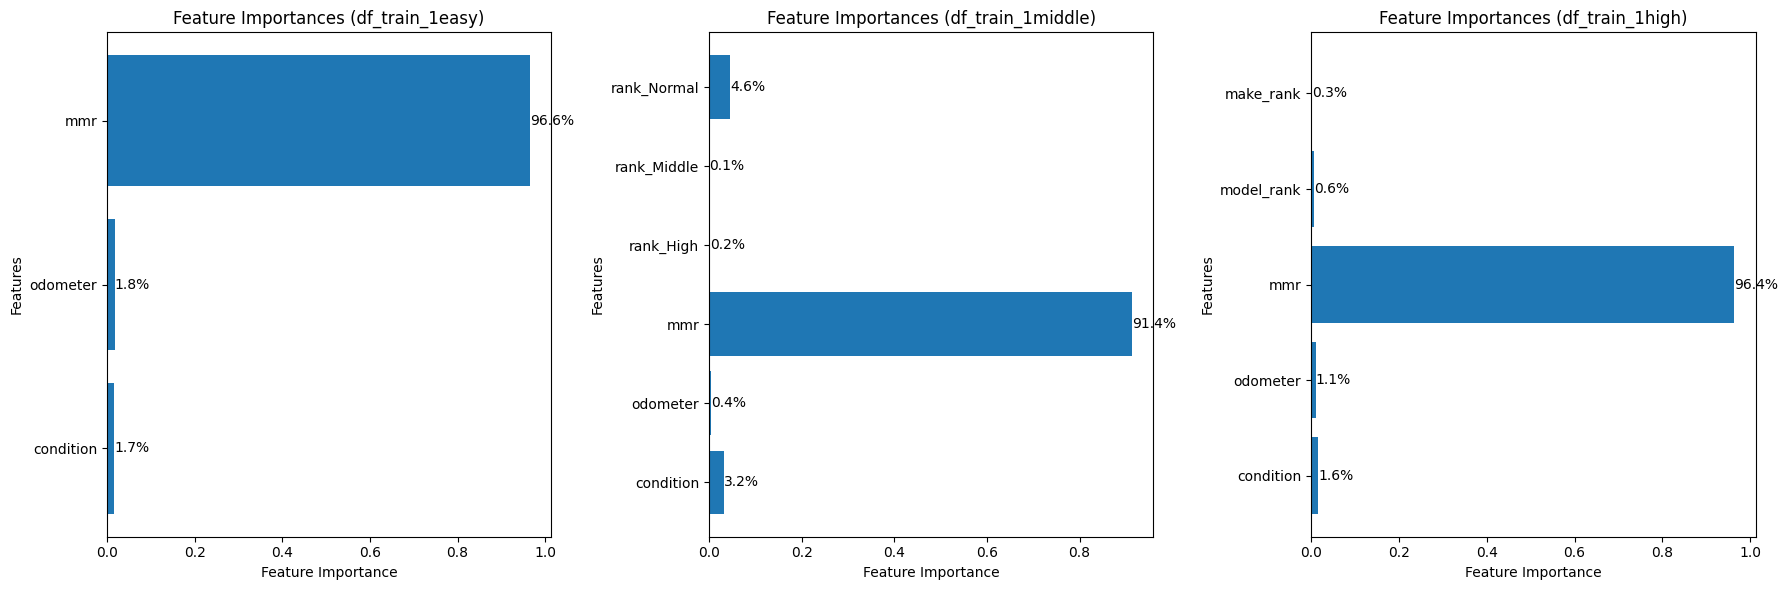

In [ ]:
# データフレームごとに処理を行う
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (df_name, df) in enumerate({"df_train_1easy": df_train_1easy, "df_train_1middle": df_train_1middle, "df_train_1high": df_train_1high}.items()):
    # 特徴量とターゲットを分割
    X = df.drop(columns=['sellingprice'])
    y = df['sellingprice']

    # ランダムフォレストモデルのインスタンス化
    model = RandomForestRegressor(random_state=0)

    # モデルの学習
    model.fit(X, y)

    # 特徴量の重要度を取得
    feature_importances = model.feature_importances_

    # 各特徴量の重要度の合計を計算
    total_importance = sum(feature_importances)

    # グラフの描画
    axs[i].barh(range(len(feature_importances)), feature_importances)
    axs[i].set_yticks(range(len(feature_importances)))
    axs[i].set_yticklabels(X.columns)
    axs[i].set_xlabel('Feature Importance')
    axs[i].set_ylabel('Features')
    axs[i].set_title(f'Feature Importances ({df_name})')

    # 各棒グラフに全体の割合を表示
    for j, importance in enumerate(feature_importances):
        axs[i].text(importance, j, f"{importance / total_importance:.1%}", ha='left', va='center')

# グラフ間のスペースを調整
plt.tight_layout()
plt.show()

## ④LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error

# 各データフレームごとに処理を行う
for df_name, df in dfs.items():
    print(f"データフレーム {df_name}")

    # 特徴量とターゲットを分割
    X = df.drop(columns=['sellingprice'])
    y = df['sellingprice']

    # 学習データとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # LightGBMのデータセットに変換
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBMのパラメータ設定
    params = {
        'objective': 'regression',  # 回帰問題
        'metric': 'l1',  # 評価指標: MAE
        'verbosity': -1,  # 計算ログを表示しない
        'seed': 42  # 乱数シード
    }

    # LightGBMモデルの学習
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=1000)

    # 訓練データの予測値の取得
    y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)

    # 訓練データのR2スコアの計算
    r2_train = r2_score(y_train, y_pred_train)
    print("訓練データのスコア (R^2):", r2_train)

    # テストデータの予測値の取得
    y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

    # テストデータのR2スコアの計算
    r2_test = r2_score(y_test, y_pred_test)
    print("検証データのスコア (R^2):", r2_test)

    # MAPEの計算
    mape = mean_absolute_error(y_test, y_pred_test) / np.mean(y_test)
    print("MAPE:", mape)

    print("\n")

データフレーム df_train_1easy
訓練データのスコア (R^2): 0.9789695814135992
検証データのスコア (R^2): 0.9612488723532682
MAPE: 0.051690225603524376


データフレーム df_train_1middle
訓練データのスコア (R^2): 0.8095187745356218
検証データのスコア (R^2): 0.7963026025417597
MAPE: 0.17661239251304234


データフレーム df_train_1high
訓練データのスコア (R^2): 0.9844608458808264
検証データのスコア (R^2): 0.9599288180466197
MAPE: 0.050989762926708655




データフレーム df_train_1easy
データフレーム df_train_1middle
データフレーム df_train_1high


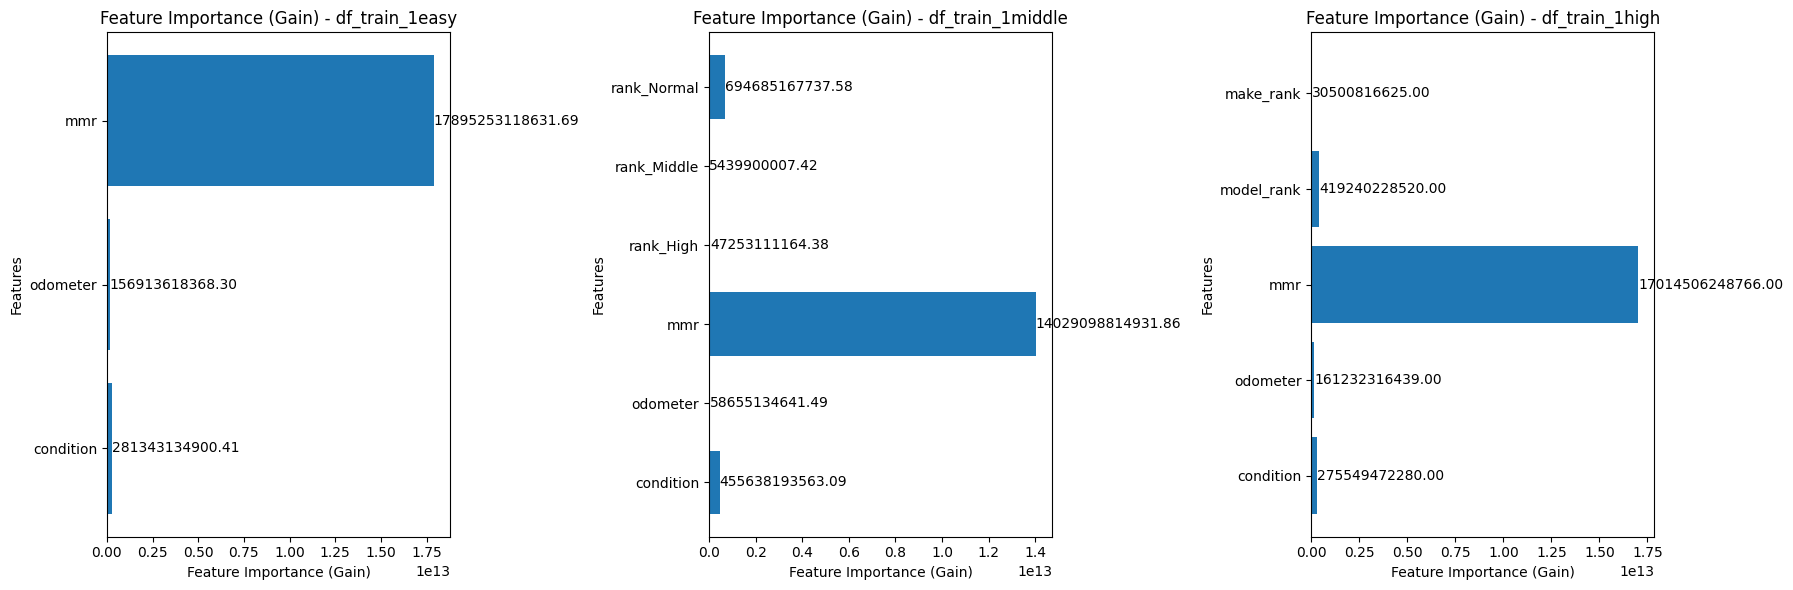

In [ ]:
# グラフを横に並べるためのサブプロットを作成
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 各データフレームごとに処理を行う
for i, (df_name, df) in enumerate(dfs.items()):
    print(f"データフレーム {df_name}")

    # 特徴量とターゲットを分割
    X = df.drop(columns=['sellingprice'])
    y = df['sellingprice']

    # 学習データとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # LightGBMのデータセットに変換
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBMのパラメータ設定
    params = {
        'objective': 'regression',  # 回帰問題
        'metric': 'l1',  # 評価指標: MAE
        'verbosity': -1,  # 計算ログを表示しない
        'seed': 42  # 乱数シード
    }

    # LightGBMモデルの学習
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=1000)

    # 特徴量の重要度を取得
    feature_importance = model.feature_importance(importance_type='gain')
    feature_names = model.feature_name()

    # グラフの描画
    axs[i].barh(range(len(feature_importance)), feature_importance)
    axs[i].set_yticks(range(len(feature_importance)))
    axs[i].set_yticklabels(feature_names)
    axs[i].set_xlabel('Feature Importance (Gain)')
    axs[i].set_ylabel('Features')
    axs[i].set_title(f'Feature Importance (Gain) - {df_name}')

    # 各棒グラフに重要度の数値を表示
    for j, importance in enumerate(feature_importance):
        axs[i].text(importance, j, f"{importance:.2f}", ha='left', va='center')

# グラフ間のスペースを調整
plt.tight_layout()
plt.show()

## ⑤Pycaret

In [ ]:
!pip install numpy==1.21.4 numba==0.53
!pip install pycaret
!pip install pandas-profiling==3.1.0

  Using cached numpy-1.21.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.

In [ ]:
data = df_train_1easy.sample(frac=0.9, random_state=786)  # 訓練データ
data_unseen = df_train_1easy.drop(data.index)  # 未知のデータ

data.reset_index(drop=True, inplace=True)  # インデックスを初期化
data_unseen.reset_index(drop=True, inplace=True)  # インデックスを初期化

print("訓練データの形状: " + str(data.shape))
print("未知のデータの形状: " + str(data_unseen.shape))

訓練データの形状: (56759, 4)
未知のデータの形状: (6307, 4)


In [ ]:
from pycaret.regression import setup

clf = setup(data=data, target="sellingprice", session_id=123, n_jobs=None)  # 環境の初期化

,Description,Value
0,Session id,123
1,Target,sellingprice
2,Target type,Regression
3,Original data shape,"(56759, 4)"
4,Transformed data shape,"(56759, 4)"
5,Transformed train set shape,"(39731, 4)"
6,Transformed test set shape,"(17028, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import compare_models

best_model = compare_models()  # 全てのモデルを訓練し、評価する

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,989.5235,3367964.4989,1831.9527,0.9708,0.1132,0.5785,3.7520
lr,Linear Regression,1089.4691,3762962.5326,1936.9999,0.9674,0.1238,0.5869,0.1250
lasso,Lasso Regression,1089.3441,3762941.8275,1936.9930,0.9674,0.1238,0.5869,0.1320
ridge,Ridge Regression,1089.4812,3762962.0714,1936.9995,0.9674,0.1238,0.5869,0.0870
lar,Least Angle Regression,1089.4690,3762962.8186,1937.0000,0.9674,0.1238,0.5869,0.0670
llar,Lasso Least Angle Regression,1089.3405,3762941.5332,1936.9930,0.9674,0.1238,0.5869,0.0510
br,Bayesian Ridge,1089.4703,3762962.6037,1936.9999,0.9674,0.1238,0.5869,0.0820
huber,Huber Regressor,1047.9354,3886674.3062,1968.8475,0.9663,0.1293,0.5877,0.2770
par,Passive Aggressive Regressor,1048.1862,3948613.9443,1984.7083,0.9657,0.1311,0.5885,0.0780
rf,Random Forest Regressor,1112.3044,3990451.5025,1995.0489,0.9653,0.1204,0.5756,14.5560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(best_model)

GradientBoostingRegressor(random_state=123)


In [ ]:
from pycaret.regression import create_model

lr = create_model("gbr")  # 線形回帰のモデルを作成

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,944.9315,2855733.4784,1689.8916,0.9714,0.0938,0.0525
1,977.8582,3566848.1359,1888.6101,0.9687,0.1857,5.2721
2,1012.2440,3831175.4300,1957.3389,0.9708,0.1031,0.0558
3,1011.6918,3410912.3080,1846.8655,0.9690,0.1119,0.0591
4,987.7285,3043612.8945,1744.5953,0.9747,0.1058,0.0576
5,1030.5522,4034727.9477,2008.6632,0.9662,0.1174,0.0639
6,995.7506,3827044.0985,1956.2832,0.9685,0.1092,0.0572
7,983.5443,3121073.4205,1766.6560,0.9730,0.0968,0.0545
8,982.1723,3052189.8740,1747.0518,0.9735,0.1012,0.0550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from pycaret.regression import tune_model

tuned_lr = tune_model(lr)  # ハイパーパラメータの調整
# 評価指標指定 (ex. optimize='RMSE')
# クロスバリデーションのfold数 (ex. fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,985.2088,3146572.0210,1773.8579,0.9684,0.0981,0.0546
1,1032.1072,3956746.3693,1989.1572,0.9653,0.1866,5.2750
2,1063.7133,4004543.9672,2001.1357,0.9695,0.1042,0.0577
3,1042.8459,3617121.6579,1901.8732,0.9671,0.1118,0.0592
4,1017.1706,3230603.4175,1797.3879,0.9731,0.1065,0.0585
5,1085.6289,4474163.6340,2115.2219,0.9625,0.1200,0.0657
6,1050.5632,4327500.7456,2080.2646,0.9643,0.1129,0.0595
7,1024.7100,3458989.4743,1859.8359,0.9700,0.1018,0.0566
8,1026.4374,3297188.4911,1815.8162,0.9714,0.1017,0.0561


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_lr)

GradientBoostingRegressor(random_state=123)


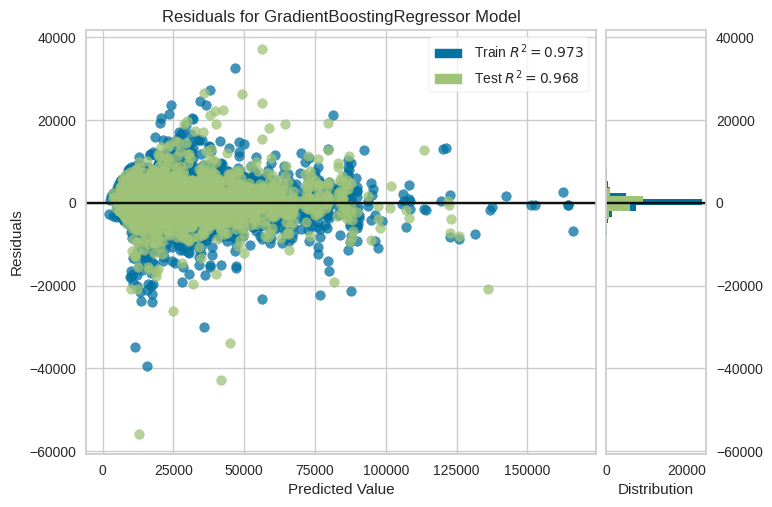

In [ ]:
from pycaret.regression import plot_model

plot_model(tuned_lr)

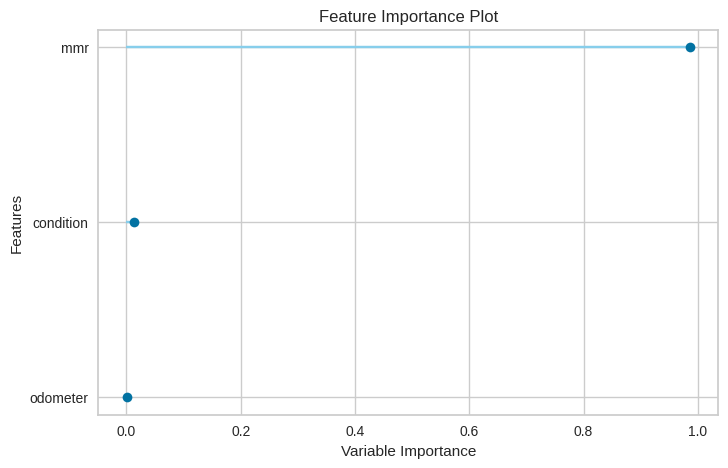

In [ ]:
plot_model(tuned_lr, plot="feature")  # 各特徴の重要度をプロット